In [1]:
from termcolor import colored
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
import numpy as np
import pandas as pd
import glob, os,sys
    
import numpy.polynomial as poly
import scipy.ndimage.filters as filt
from scipy.signal import argrelmax, argrelmin
import seaborn as sns
sns.set()



In [2]:
harps_objs = pd.read_csv("/Users/jtorresh/Desktop/TODO/GradResearch/2014/myobjs_harps2019.csv")
harps_objs

Unnamed: 0                              file        ID         RA  \
0            0  ADP.2014-09-23T11_00_45.350.fits  V392-Car  119.55050   
1            1  ADP.2014-09-23T11_00_48.230.fits  V392-Car  119.54486   
2            2  ADP.2014-09-23T11_01_10.970.fits  V392-Car  119.54560   
3            3  ADP.2014-09-23T11_01_13.437.fits  V392-Car  119.54825   
4            4  ADP.2014-09-23T11_01_17.427.fits  V392-Car  119.55016   
5            5  ADP.2014-09-23T11_01_34.467.fits  V392-Car  119.54562   
6            6  ADP.2014-09-23T11_01_41.897.fits  V392-Car  119.54887   
7            7  ADP.2014-09-23T11_01_49.103.fits  V392-Car  119.54821   
8            8  ADP.2014-09-23T11_01_52.180.fits  V392-Car  119.54745   
9            9  ADP.2014-09-23T11_02_17.370.fits  V392-Car  119.55102   
10          10  ADP.2014-09-23T11_02_30.650.fits  V392-Car  119.54983   
11          11  ADP.2014-09-23T11_02_44.973.fits  V392-Car  119.54783   
12          12  ADP.2014-09-23T11_02_55.860.fits  V392-Car  119.55346   
13          13  ADP.2014-09-23T11_03_32.913.fits  V392-Car  119.54783   
14          14  ADP.2014-09-23T11_03_43.473.fits  V392-Car  119.54868   
15          15  ADP.2014-09-23T11_03_52.867.fits  V392-Car  119.54788   
16          16  ADP.2014-09-23T11_03_53.490.fits  V392-Car  119.54859   
17          17  ADP.2014-09-23T11_04_00.803.fits  V392-Car  119.54509   
18          18  ADP.2014-09-23T11_04_08.257.fits  V392-Car  119.54449   
19          19  ADP.2014-09-23T11_04_10.497.fits  V392-Car  119.55103   
20          20  ADP.2014-09-23T11_04_21.177.fits  V392-Car  119.54484   
21          21  ADP.2014-09-23T11_04_21.897.fits  V392-Car  119.54832   
22          22  ADP.2014-09-23T11_04_25.993.fits  V392-Car  119.55004   
23          23  ADP.2014-09-23T11_04_31.313.fits  V392-Car  119.55029   
24          24  ADP.2014-09-23T11_05_07.263.fits  V392-Car  119.55156   
25          25  ADP.2014-09-23T11_05_14.037.fits  V392-Car  119.55011   
26          26  ADP.2014-09-23T11_05_30.717.fits  V392-Car  119.54815   
27          27  ADP.2014-09-23T11_05_33.363.fits  V392-Car  119.55067   
28          28  ADP.2014-09-23T11_05_33.390.fits  V392-Car  119.55039   
29          29  ADP.2014-09-23T11_05_47.177.fits  V392-Car  119.55118   
30          30  ADP.2014-09-23T11_05_54.643.fits  V392-Car  119.54554   
31          31  ADP.2014-09-23T11_06_07.137.fits  V392-Car  119.54630   

         DEC  EXPTIME       MJD-OBS       MJD_END  WAVELMIN  WAVELMAX    SNR  \
0  -60.86875    200.0  54924.182494  54924.184809   378.139   691.312  41.75   
1  -60.86651    200.0  54925.981809  54925.984123   378.141   691.310  38.75   
2  -60.86688    200.0  54928.975892  54928.978207   378.143   691.310  54.70   
3  -60.86640    200.0  54926.045222  54926.047537   378.141   691.310  34.90   
4  -60.86713    200.0  54927.141579  54927.143894   378.144   691.310  36.95   
5  -60.86664    200.0  54927.104750  54927.107064   378.143   691.310  39.35   
6  -60.86647    200.0  54928.057265  54928.059580   378.140   691.310  52.15   
7  -60.86654    200.0  54928.022380  54928.024694   378.140   691.310  51.60   
8  -60.86667    200.0  54925.025110  54925.027425   378.141   691.312  50.35   
9  -60.86870    200.0  54925.183064  54925.185379   378.140   691.310  37.45   
10 -60.86703    200.0  54924.126720  54924.129034   378.139   691.312  55.20   
11 -60.86637    200.0  54927.016090  54927.018405   378.142   691.310  44.40   
12 -60.87074    200.0  54925.212270  54925.214585   378.140   691.310  35.60   
13 -60.86685    200.0  54929.016683  54929.018998   378.143   691.309  49.15   
14 -60.86671    200.0  54925.063476  54925.065791   378.141   691.310  48.70   
15 -60.86661    300.0  54926.082351  54926.085823   378.141   691.310  44.80   
16 -60.86640    200.0  54927.055944  54927.058259   378.142   691.310  49.20   
17 -60.86657    200.0  54923.985613  54923.987928   378.140   691.311  57.40   
18 -60.86671    200.0  54924.978368  54924.980683   378.141   691.312  40.

In [3]:
def rMax_MedFilt(folder, file, objs_info, row):
    Table = pyfits.open('/Users/jtorresh/Desktop/'+folder+"/"+file) 
    head = Table[0].header
    tbdata= Table[1].data
    wavel = tbdata[0][0]
    flux  = tbdata[0][1]
    
    #wavel, flux = np.loadtxt(file_pth, usecols=(0,1), unpack=True)
    objs_table = pd.read_csv("/Users/jtorresh/Desktop/"+folder+"/"+objs_info)
    
    plt.figure()
    #fig= plt.figure(figsize=(20, 20))
    fig=plt.figure()
    fig.subplots_adjust(hspace=0.7, wspace=0.3)
    axis_font = {'fontname':'Arial', 'size':'20'}
    title_font = {'fontname':'Arial', 'size':'25', 'color':'navy', 'weight':'bold',
      'verticalalignment':'bottom'} 
    
    
    
    plt.title("Original Spectrum"+" ,\n" + objs_table.loc[row, 'file']+" ," + "Instrument:"+
             objs_table.loc[row,"INSTRUME"]+" ,\n"+ "Observation date:" + objs_table.loc[row,"DATE-OBS"])
    plt.plot(wavel[flux>0], flux[flux>0])
    plt.show()
    
    wavel_new = wavel[flux>0]
    flux_new = flux[flux>0]
    what_to_do = input("Do you want to fit a model (yes/no):") 
    
    
    data_w=[]
    data_f=[]
    data_fn=[]
    data_wz=[]
    data_maxima=[]
    data_p=[]
    data_pw=[]
    poly_pars=[]
    
    
    while what_to_do=='yes':
        waveLow,waveUp= map(float,input(colored("Give me a lower and upper wavelengths to fit?","red")).split(","))
        
        
        indwavL = (np.abs(wavel_new-waveLow)).argmin() 
        indwavU= (np.abs(wavel_new-waveUp)).argmin()
        print(colored(indwavL,'green'))
        print(colored(indwavU,'green'))
            
        # wavelength between a given range to be fitted
        w= wavel_new[indwavL:indwavU]
        # flux between a given range to be fitted
        f= flux_new[indwavL:indwavU]
        

        choice1 = input(colored("Do you want to use relative max polynomial fitting(yes/no):","red"))

        
        if choice1=='yes':
            print(colored("Lets do relative max polynomial fitting.","blue"))

            window_sz=int(input(colored("Give me a window size to do the relative maximum search:","red")))
            # find relative maxima in the range: indwavL to indwavU
            maxima = argrelmax(f, order=window_sz)
            # fit a polynomial to the relative maxima points found above
            polyfit_parms= np.polyfit(w[maxima],f[maxima],3)
            #prediction model using above parameters
            p3 = np.poly1d(polyfit_parms)
            
            plt.figure()
            plt.title("Part of Spectrum to be normalized"+" ,\n" + objs_table.loc[row, 'file']+" ," + "Instrument:"+
                      objs_table.loc[row,"INSTRUME"]+" ,\n"+ "Observation date:" + objs_table.loc[row,"DATE-OBS"])
    
            plt.plot(w, f)
            plt.plot(w[maxima],f[maxima],'o')
            plt.plot(w, p3(w))
            
            plt.figure()
            plt.title("Normalized Spectrum"+" ,\n" + objs_table.loc[row, 'file']+" ," + "Instrument:"+
             objs_table.loc[row,"INSTRUME"]+" ,\n"+ "Observation date:" + objs_table.loc[row,"DATE-OBS"])
    
            normFlux=f/p3(w)
            plt.plot(w,  normFlux)
            plt.show()
            
            save_choice =  input(colored("Do you want to save this fit(yes/no):","red"))
            if save_choice=='yes':
                #np.savetxt( objs_table.loc[row, 'File Name'][:-5]+'.txt',np.asarray([w,normFlux]).T )

                data_w.append(np.asarray(w))
                data_f.append(np.asarray(f))
                data_fn.append(np.asarray(normFlux))
                data_wz.append(np.asanyarray(window_sz))
                data_maxima.append(np.asanyarray(maxima))
                data_p.append(np.asanyarray(p3))
                data_pw.append(np.asanyarray(p3(w)))
                poly_pars.append(np.asanyarray(polyfit_parms)) 
                
            
            what_to_do = input(colored("Do you want to keep fitting(yes/no):","red") )
            
            
        '''   
        choice2 = input(colored("Do you want to use median filter fitting(yes/no):","red"))
        if choice2 =='yes':
            print(colored('Lets try median filter fitting.',"green"))
   
            
            w_sz=int(input(colored("Give me a window size to do median filter fit:","red")))
            
            med_flux = filt.median_filter(f,size=w_sz,mode='reflect')
            plt.figure()
            plt.title("part of Spectrum to be normalized"+" ,\n" + objs_table.loc[row, 'File Name']+" ," + "Instrument:"+
             objs_table.loc[row,"Instrument"]+" ,\n"+ "Observation date:" + objs_table.loc[row,"Observation Date"])
    
            plt.plot(w, f)
            plt.plot(w, med_flux)
            plt.figure()
            plt.title("Normalized Spectrum"+" ,\n" + objs_table.loc[row, 'File Name']+" ," + "Instrument:"+
             objs_table.loc[row,"Instrument"]+" ,\n"+ "Observation date:" + objs_table.loc[row,"Observation Date"])
            plt.plot(w, f/med_flux)
            plt.show()

            
            save_choice =  input(colored("Do you want to save this fit(yes/no):","red"))
            if save_choice=='yes':
                #np.savetxt( objs_table.loc[row, 'File Name'][:-5]+'.txt',np.asarray([w,normFlux]).T )
                
                data_w.append(np.asarray(w))
                data_f.append(np.asarray(f))
                data_fn.append(np.asarray(f/med_flux))
                
                
            what_to_do = input(colored("Do you want to keep fitting(yes/no):","red"))       
        '''
  
    return data_w, data_f, data_fn, data_wz, data_maxima, data_p, data_pw
    

ADP.2014-09-23T11_05_30.717.fits HARPS 2009-04-03T00:53:44.271


<Figure size 432x288 with 0 Axes>

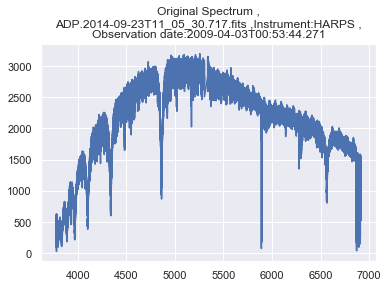

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21861
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


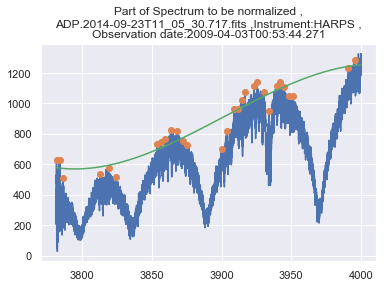

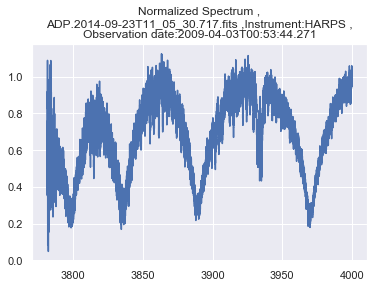

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21861
146861
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


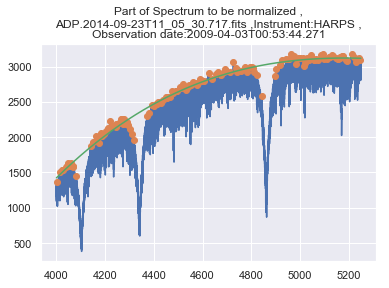

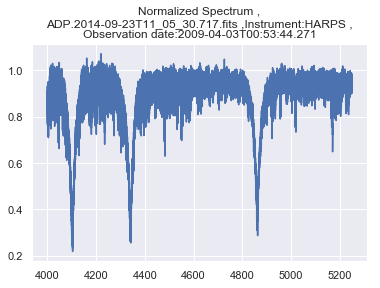

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146861
178566
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


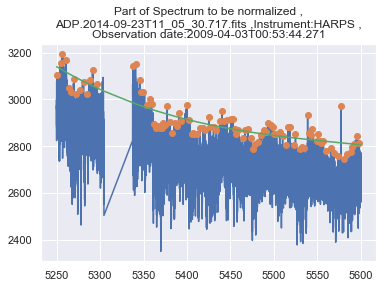

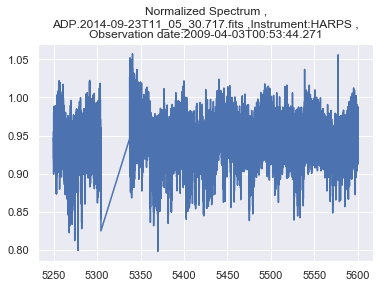

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178566
228566
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


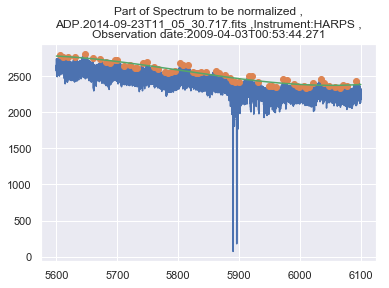

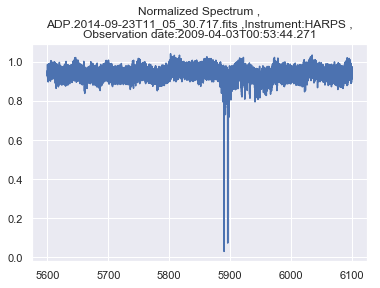

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228566
309878
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


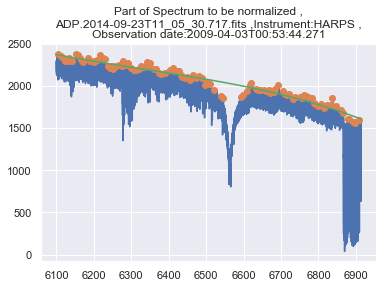

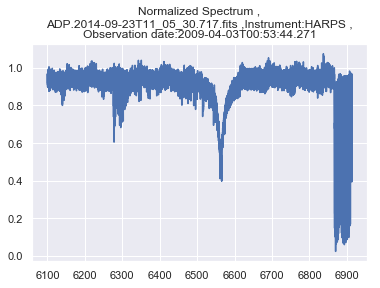

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_05_33.363.fits HARPS 2009-04-03T04:18:53.613


<Figure size 432x288 with 0 Axes>

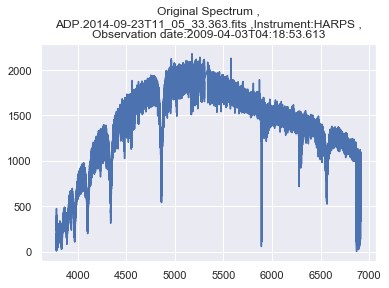

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21850
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


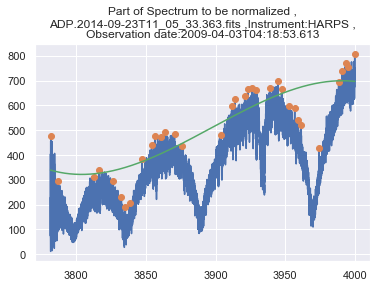

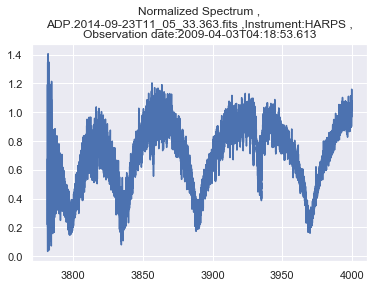

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21850
146850
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


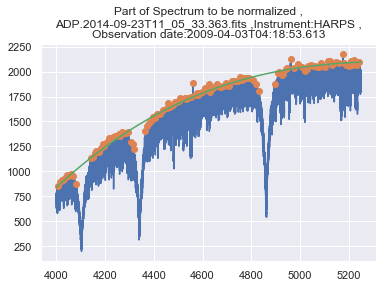

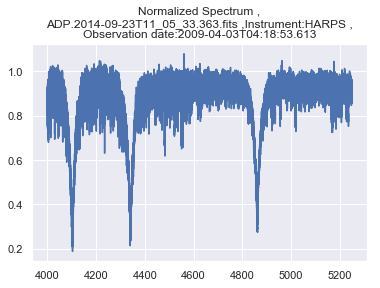

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146850
178556
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


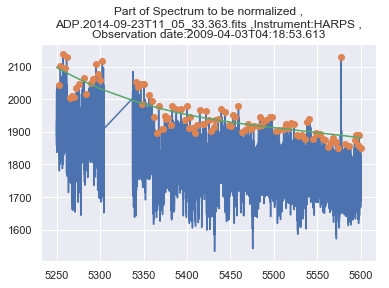

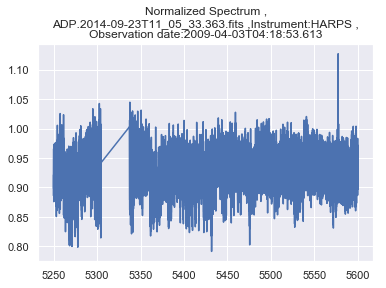

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178556
228556
Do you want to use relative max polynomial fitting(yes/no):350
Give me a lower and upper wavelengths to fit?5600,6100
178556
228556
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


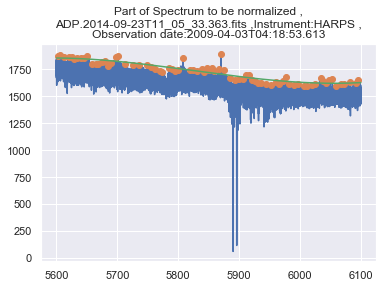

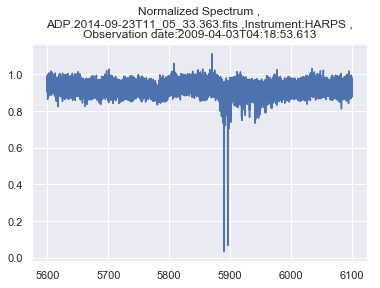

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228556
309868
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


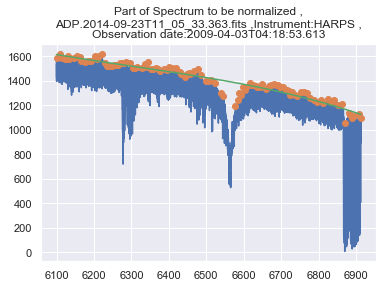

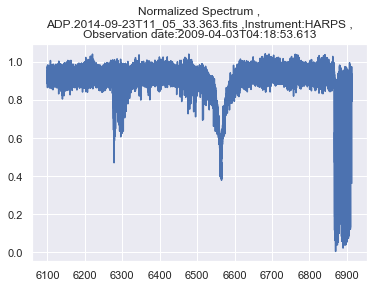

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_05_33.390.fits HARPS 2009-04-07T03:53:32.271


<Figure size 432x288 with 0 Axes>

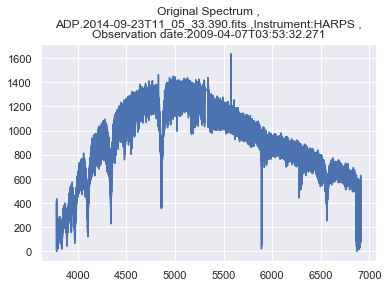

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21840
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


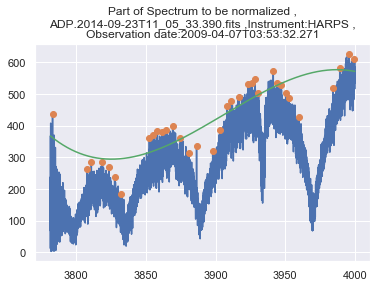

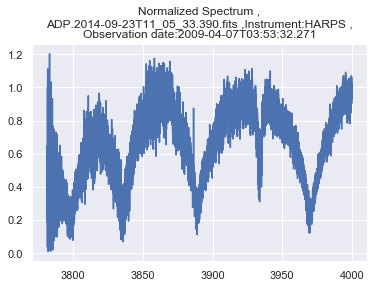

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21840
146840
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


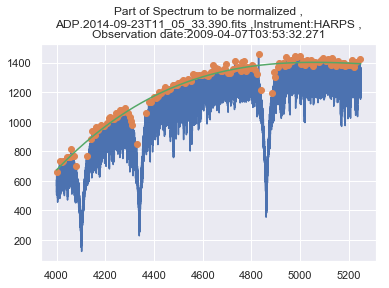

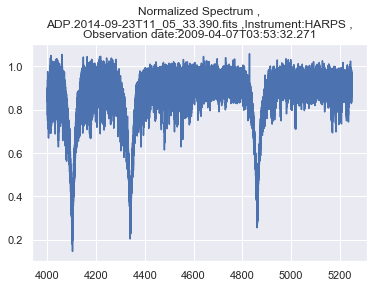

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146840
178545
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


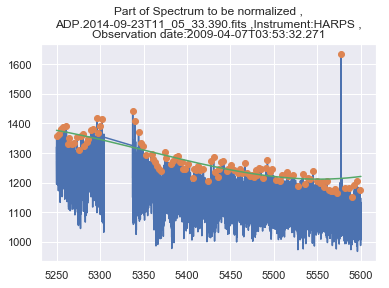

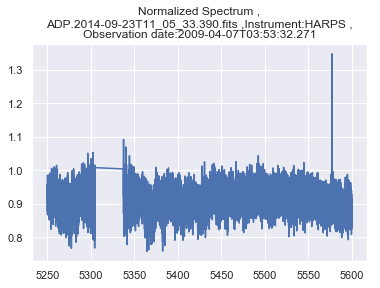

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146840
178545
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:100


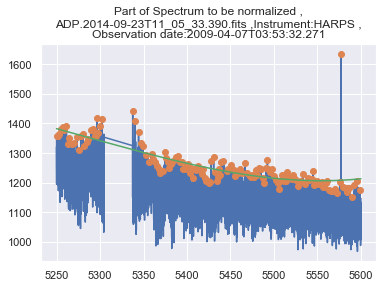

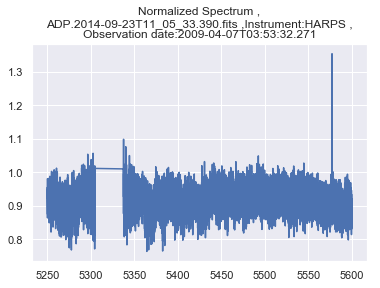

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178545
228545
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


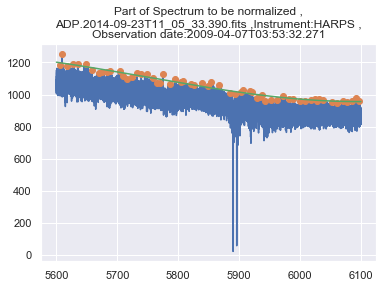

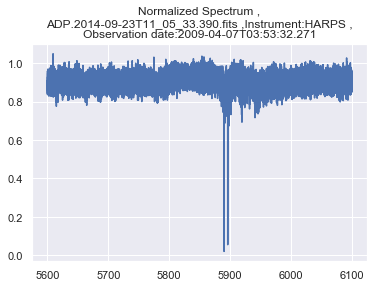

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228545
309854
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


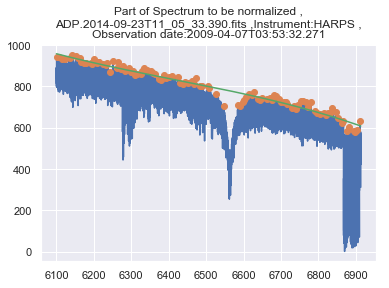

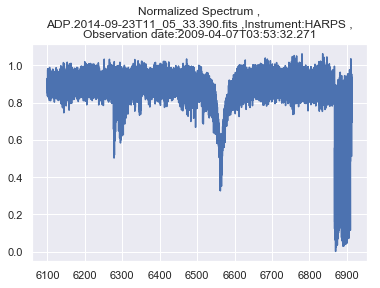

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_05_47.177.fits HARPS 2009-04-05T03:41:54.295


<Figure size 432x288 with 0 Axes>

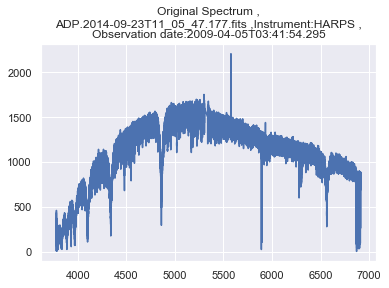

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21845
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


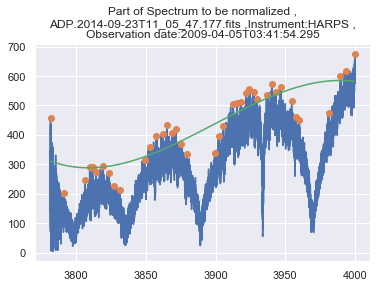

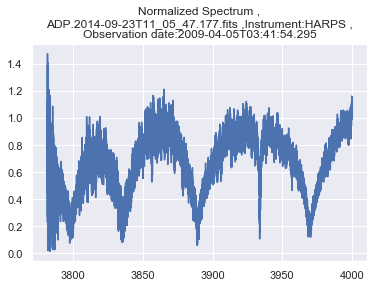

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21845
146845
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


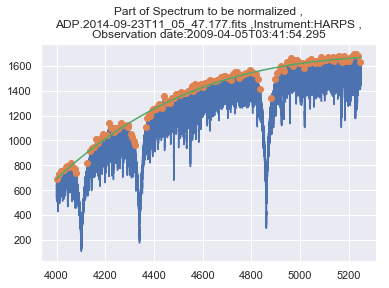

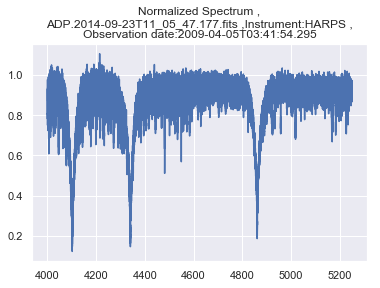

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146845
178551
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


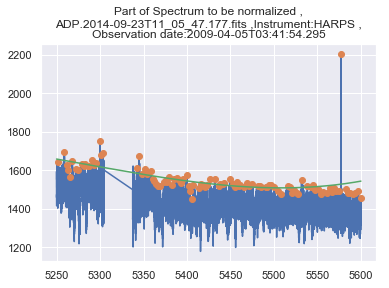

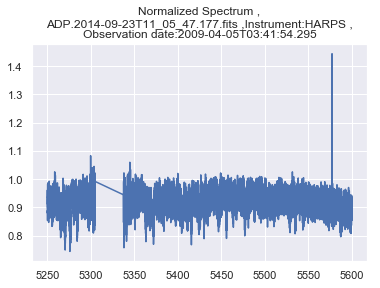

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146845
178551
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:100


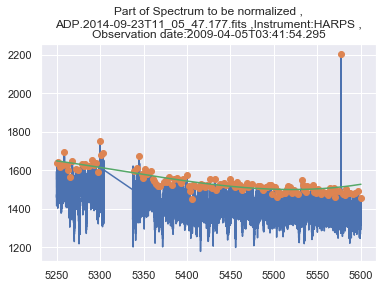

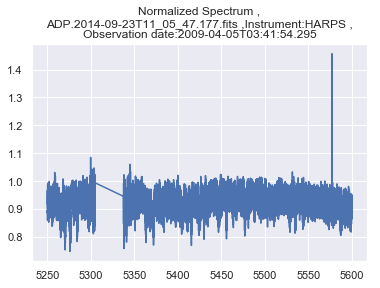

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146845
178551
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:70


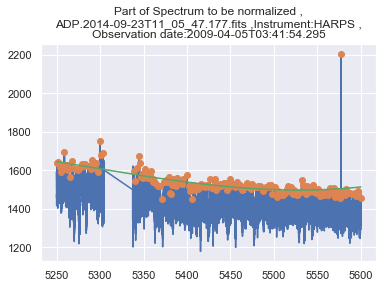

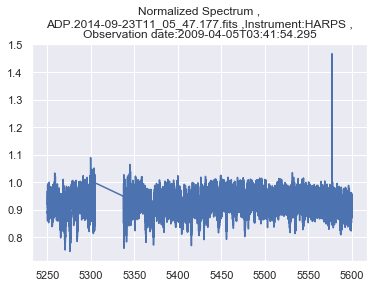

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178551
228551
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


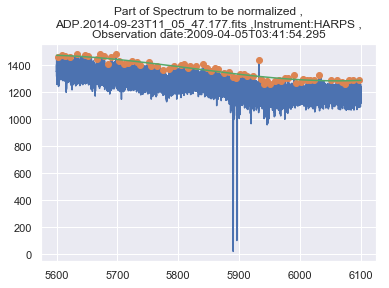

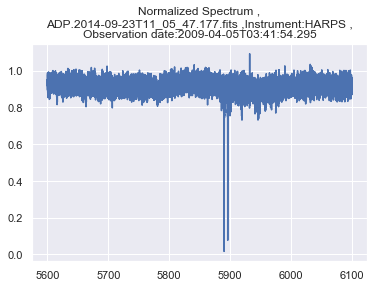

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228551
309861
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


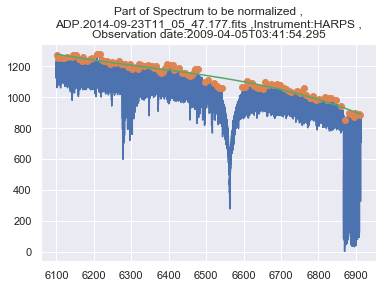

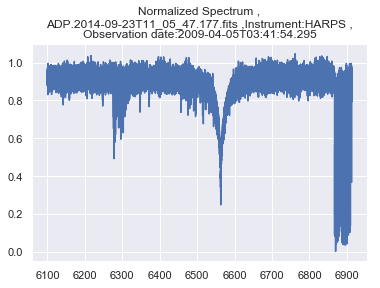

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_05_54.643.fits HARPS 2009-04-08T02:16:32.094


<Figure size 432x288 with 0 Axes>

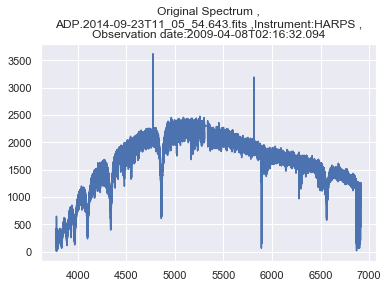

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21853
Do you want to use relative max polynomial fitting(yes/no):yes 
Give me a lower and upper wavelengths to fit?3700,4000
0
21853
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


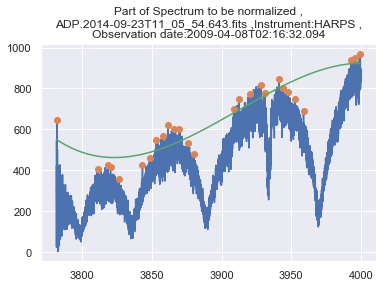

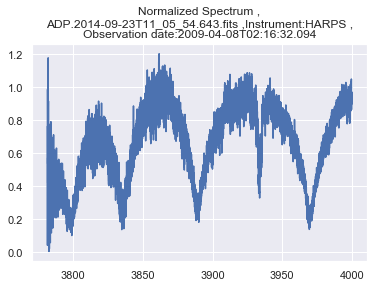

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21853
146853
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


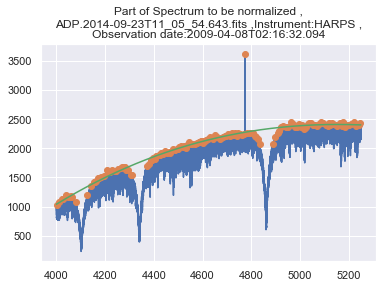

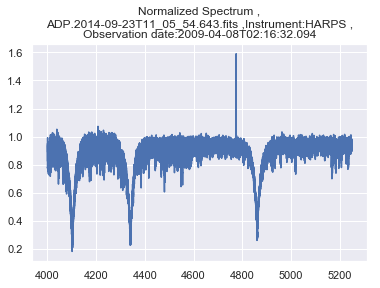

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146853
178558
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


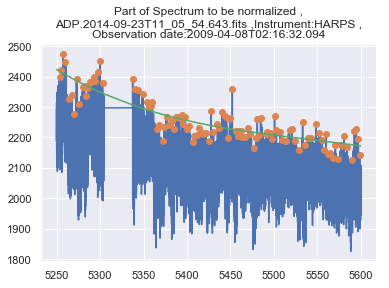

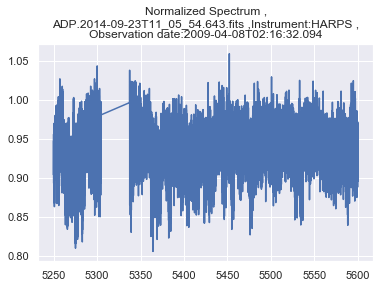

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178558
228558
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


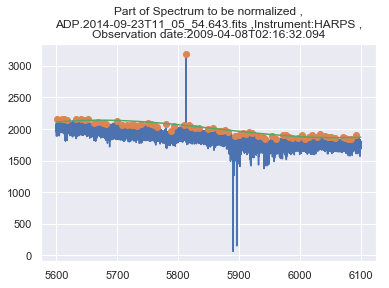

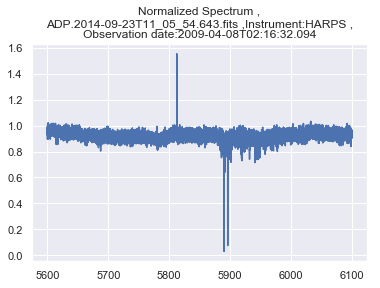

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178558
228558
Do you want to use relative max polynomial fitting(yes/no):300
Give me a lower and upper wavelengths to fit?5600,6100
178558
228558
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:300


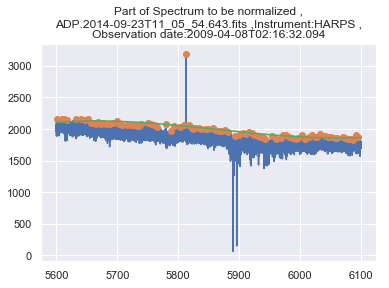

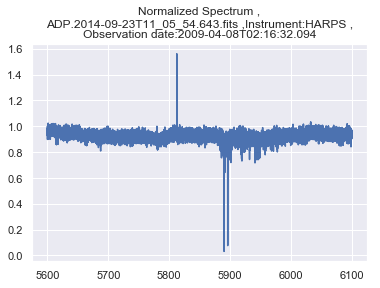

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178558
228558
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:250


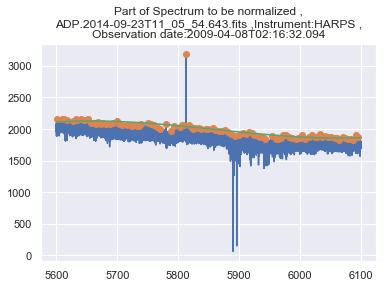

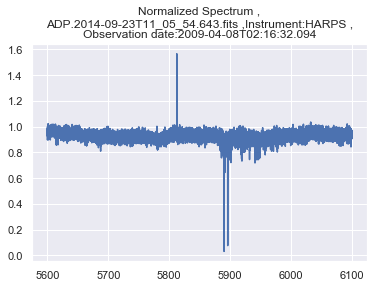

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228558
309867
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


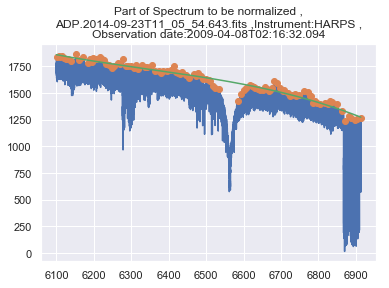

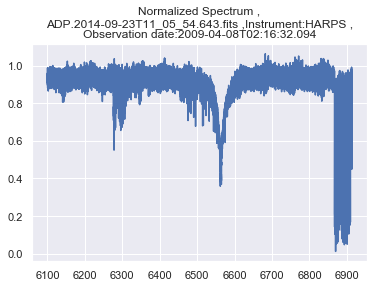

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_06_07.137.fits HARPS 2009-04-06T23:43:44.312


<Figure size 432x288 with 0 Axes>

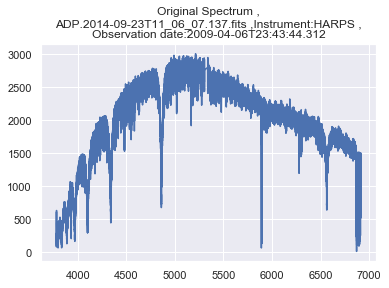

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21860
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


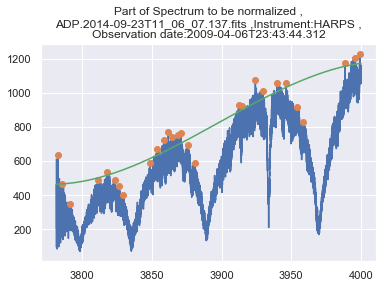

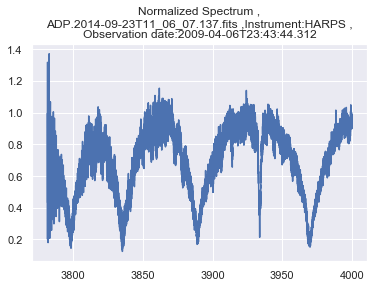

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21860
146860
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


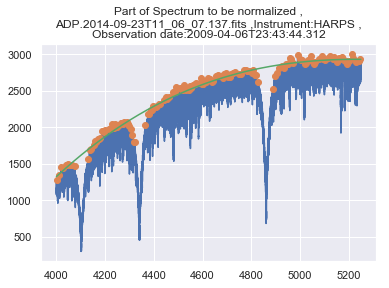

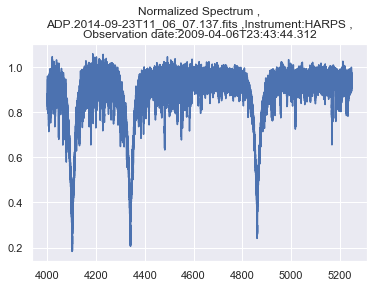

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146860
178565
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


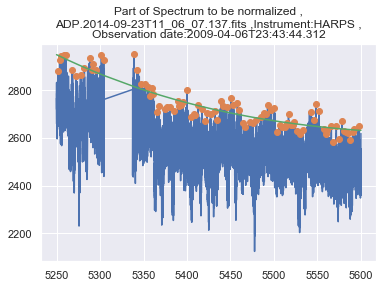

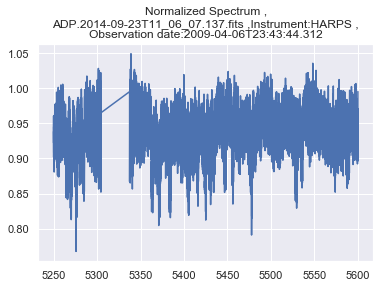

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178565
228565
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


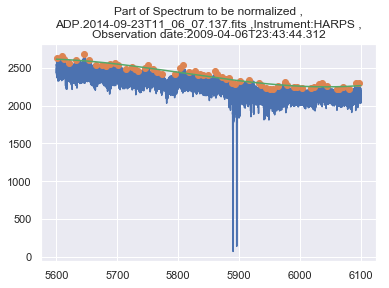

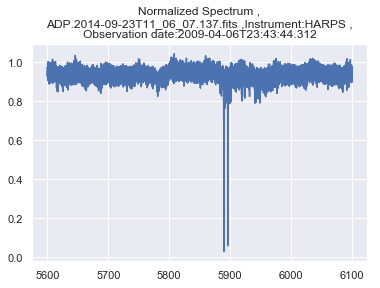

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228565
309875
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


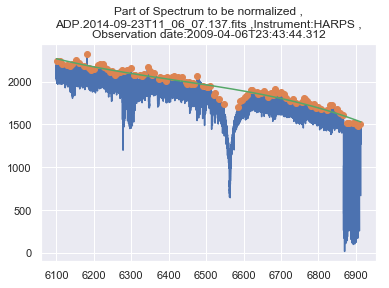

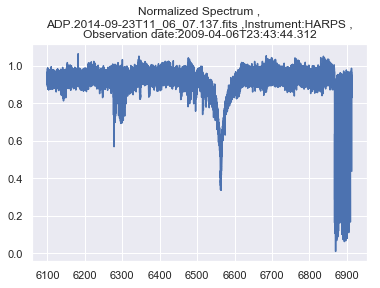

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no


In [71]:
fi = []
instr=[]
obs=[]

wavelen = []
flux = []
flux_norm=[]

wz=[]
maxima=[]
p=[]
pw=[]



for file_row in np.arange(26,32):#range(len(harps_objs["file"])):
    print(harps_objs.loc[file_row,"file"], harps_objs.loc[file_row,"INSTRUME"], harps_objs.loc[file_row,"DATE-OBS"])
    
    
    R=rMax_MedFilt(str('TODO/GradResearch/2014'), str(harps_objs.loc[file_row,"file"]),str("myobjs_harps2019.csv"), file_row)

    fi.append(harps_objs.loc[file_row,"file"])
    obs.append(harps_objs.loc[file_row,"DATE-OBS"])
    instr.append(harps_objs.loc[file_row,"INSTRUME"])
    
    
    wavelen.append(R[0])
    flux.append(R[1])
    flux_norm.append(R[2])
    
    wz.append(R[3])
    maxima.append(R[4])
    p.append(R[5])
    pw.append(R[6])
    
    

In [72]:
fi,instr,obs, wz


(['ADP.2014-09-23T11_05_30.717.fits',
  'ADP.2014-09-23T11_05_33.363.fits',
  'ADP.2014-09-23T11_05_33.390.fits',
  'ADP.2014-09-23T11_05_47.177.fits',
  'ADP.2014-09-23T11_05_54.643.fits',
  'ADP.2014-09-23T11_06_07.137.fits'],
 ['HARPS', 'HARPS', 'HARPS', 'HARPS', 'HARPS', 'HARPS'],
 ['2009-04-03T00:53:44.271',
  '2009-04-03T04:18:53.613',
  '2009-04-07T03:53:32.271',
  '2009-04-05T03:41:54.295',
  '2009-04-08T02:16:32.094',
  '2009-04-06T23:43:44.312'],
 [[array(200), array(350), array(150), array(350), array(350)],
  [array(200), array(350), array(150), array(350), array(350)],
  [array(200), array(350), array(100), array(350), array(350)],
  [array(200), array(350), array(70), array(350), array(350)],
  [array(200), array(350), array(150), array(250), array(350)],
  [array(200), array(350), array(150), array(350), array(350)]])

['ADP.2014-09-23T11_05_30.717.fits',
 'ADP.2014-09-23T11_05_33.363.fits',
 'ADP.2014-09-23T11_05_33.390.fits',
 'ADP.2014-09-23T11_05_47.177.fits',
 'ADP.2014-09-23T11_05_54.643.fits',
 'ADP.2014-09-23T11_06_07.137.fits']

In [75]:
len(fi),len(instr),len(obs),len(wz)


(6, 6, 6, 6)

In [76]:
wavelen,flux,flux_norm,pw

([[array([3781.39, 3781.4 , 3781.41, ..., 3999.97, 3999.98, 3999.99]),
   array([4000.  , 4000.01, 4000.02, ..., 5249.97, 5249.98, 5249.99]),
   array([5250.  , 5250.01, 5250.02, ..., 5599.97, 5599.98, 5599.99]),
   array([5600.  , 5600.01, 5600.02, ..., 6099.97, 6099.98, 6099.99]),
   array([6100.  , 6100.01, 6100.02, ..., 6913.09, 6913.1 , 6913.11])],
  [array([3781.39, 3781.4 , 3781.41, ..., 3999.97, 3999.98, 3999.99]),
   array([4000.  , 4000.01, 4000.02, ..., 5249.97, 5249.98, 5249.99]),
   array([5250.  , 5250.01, 5250.02, ..., 5599.97, 5599.98, 5599.99]),
   array([5600.  , 5600.01, 5600.02, ..., 6099.97, 6099.98, 6099.99]),
   array([6100.  , 6100.01, 6100.02, ..., 6913.09, 6913.1 , 6913.11])],
  [array([3781.4 , 3781.41, 3781.42, ..., 3999.97, 3999.98, 3999.99]),
   array([4000.  , 4000.01, 4000.02, ..., 5249.97, 5249.98, 5249.99]),
   array([5250.  , 5250.01, 5250.02, ..., 5599.97, 5599.98, 5599.99]),
   array([5600.  , 5600.01, 5600.02, ..., 6099.97, 6099.98, 6099.99]),
   a

In [77]:
len(wavelen),len(flux),len(flux_norm), len(pw)

(6, 6, 6, 6)

In [78]:
len(wavelen[0]),len(flux[0]),len(flux_norm[0]), len(pw[0])

(5, 5, 5, 5)

In [79]:
len(wavelen[0][0]),len(flux[0][0]),len(flux_norm[0][0]), len(pw[0][0])

(21861, 21861, 21861, 21861)

In [80]:
maxima, p

([[array([[    7,   243,   491,  3127,  3744,  4278,  7216,  7541,  7807,
            8195,  8629,  9095,  9344, 11885, 12248, 12757, 13007, 13315,
           13527, 14196, 14417, 14907, 15277, 15811, 16042, 16346, 16678,
           16977, 20966, 21419]]),
   array([[   292,   1472,   2120,   2798,   3786,   4323,   4826,   5466,
             5883,   6643,   7005,   8054,  14060,  14864,  16131,  16780,
            17322,  18014,  18477,  18833,  19463,  20506,  21170,  21990,
            22991,  24301,  24668,  25558,  26502,  26903,  27401,  27824,
            28543,  29032,  29405,  30282,  31234,  31738,  37205,  38093,
            39181,  39903,  40773,  41186,  41816,  42335,  43037,  43919,
            45083,  45512,  45864,  46474,  47414,  47847,  48912,  49284,
            49702,  50618,  51265,  51789,  52880,  53339,  54102,  54507,
            55223,  55951,  56958,  57579,  58062,  58933,  59318,  59745,
            60568,  62600,  64094,  65462,  66166,  67643,  68926,  

In [81]:
len(maxima),len(p)

(6, 6)

In [82]:
# each array of relative maxima arrays has different number of relative maxs found
for i in range(len(maxima)):
    print(len(maxima[i]))
    for ii in range(len(maxima[i])):
        print(len(maxima[i][ii][0]))
        
        

5
30
146
104
61
112
5
35
128
104
78
114
5
35
151
154
61
110
5
40
154
197
68
106
5
27
152
111
100
107
5
28
151
93
62
107


In [84]:
ov = []
for li in range(len(wavelen)):
    print(colored(len(wavelen[li]),'red'))
    specp = 0
    ovi = []
    
    for lii in range(len(wavelen[li])):
        print('&&&&&')
        print(len(wavelen[li][lii]))
        print(maxima[li][lii])
        print(colored(maxima[li][lii]+specp,'green'))
        ovi.append(maxima[li][lii]+specp)
        specp+=len(wavelen[li][lii])
        print(colored(specp,'blue'))
    print(colored(ovi,'red'))
    
    
    ov.append(ovi) 

5
&&&&&
21861
[[    7   243   491  3127  3744  4278  7216  7541  7807  8195  8629  9095
   9344 11885 12248 12757 13007 13315 13527 14196 14417 14907 15277 15811
  16042 16346 16678 16977 20966 21419]]
[[    7   243   491  3127  3744  4278  7216  7541  7807  8195  8629  9095
   9344 11885 12248 12757 13007 13315 13527 14196 14417 14907 15277 15811
  16042 16346 16678 16977 20966 21419]]
21861
&&&&&
125000
[[   292   1472   2120   2798   3786   4323   4826   5466   5883   6643
    7005   8054  14060  14864  16131  16780  17322  18014  18477  18833
   19463  20506  21170  21990  22991  24301  24668  25558  26502  26903
   27401  27824  28543  29032  29405  30282  31234  31738  37205  38093
   39181  39903  40773  41186  41816  42335  43037  43919  45083  45512
   45864  46474  47414  47847  48912  49284  49702  50618  51265  51789
   52880  53339  54102  54507  55223  55951  56958  57579  58062  58933
   59318  59745  60568  62600  64094  65462  66166  67643  68926  69380
   69766  71365

In [85]:
mxs = []
for l in range(len(ov)):
    print(l)
    print(np.concatenate(ov[l], axis=1))
    

0
[[     7    243    491   3127   3744   4278   7216   7541   7807   8195
    8629   9095   9344  11885  12248  12757  13007  13315  13527  14196
   14417  14907  15277  15811  16042  16346  16678  16977  20966  21419
   22153  23333  23981  24659  25647  26184  26687  27327  27744  28504
   28866  29915  35921  36725  37992  38641  39183  39875  40338  40694
   41324  42367  43031  43851  44852  46162  46529  47419  48363  48764
   49262  49685  50404  50893  51266  52143  53095  53599  59066  59954
   61042  61764  62634  63047  63677  64196  64898  65780  66944  67373
   67725  68335  69275  69708  70773  71145  71563  72479  73126  73650
   74741  75200  75963  76368  77084  77812  78819  79440  79923  80794
   81179  81606  82429  84461  85955  87323  88027  89504  90787  91241
   91627  93226  94530  95512  96072  96459  97798  98969  99391  99775
  100189 101171 102023 102618 103170 104284 106301 111607 112237 113502
  114348 116214 117397 118037 118444 119370 120183 120536 1213

In [86]:
for nams in range(len(wavelen)):
    print(nams)

0
1
2
3
4
5


In [91]:
harps_objs['file'][26:]

26    ADP.2014-09-23T11_05_30.717.fits
27    ADP.2014-09-23T11_05_33.363.fits
28    ADP.2014-09-23T11_05_33.390.fits
29    ADP.2014-09-23T11_05_47.177.fits
30    ADP.2014-09-23T11_05_54.643.fits
31    ADP.2014-09-23T11_06_07.137.fits
Name: file, dtype: object

In [89]:
fi

['ADP.2014-09-23T11_05_30.717.fits',
 'ADP.2014-09-23T11_05_33.363.fits',
 'ADP.2014-09-23T11_05_33.390.fits',
 'ADP.2014-09-23T11_05_47.177.fits',
 'ADP.2014-09-23T11_05_54.643.fits',
 'ADP.2014-09-23T11_06_07.137.fits']

In [94]:
for nams in range(len(wavelen)):
    print(harps_objs['file'][nams+26][:-5])

ADP.2014-09-23T11_05_30.717
ADP.2014-09-23T11_05_33.363
ADP.2014-09-23T11_05_33.390
ADP.2014-09-23T11_05_47.177
ADP.2014-09-23T11_05_54.643
ADP.2014-09-23T11_06_07.137


ADP.2014-09-23T11_05_30.717
[3781.46 3783.82 3786.3  3812.66 3818.83 3824.17 3853.55 3856.8  3859.46
 3863.34 3867.68 3872.34 3874.83 3900.24 3903.87 3908.96 3911.46 3914.54
 3916.66 3923.35 3925.56 3930.46 3934.16 3939.5  3941.81 3944.85 3948.17
 3951.16 3991.05 3995.58 4002.92 4014.72 4021.2  4027.98 4037.86 4043.23
 4048.26 4054.66 4058.83 4066.43 4070.05 4080.54 4140.6  4148.64 4161.31
 4167.8  4173.22 4180.14 4184.77 4188.33 4194.63 4205.06 4211.7  4219.9
 4229.91 4243.01 4246.68 4255.58 4265.02 4269.03 4274.01 4278.24 4285.43
 4290.32 4294.05 4302.82 4312.34 4317.38 4372.05 4380.93 4391.81 4399.03
 4407.73 4411.86 4418.16 4423.35 4430.37 4439.19 4450.83 4455.12 4458.64
 4464.74 4474.14 4478.47 4489.12 4492.84 4497.02 4506.18 4512.65 4517.89
 4528.8  4533.39 4541.02 4545.07 4552.23 4559.51 4569.58 4575.79 4580.62
 4589.33 4593.18 4597.45 4605.68 4626.   4640.94 4654.62 4661.66 4676.43
 4689.26 4693.8  4697.66 4713.65 4726.69 4736.51 4742.11 4745.98 4759.37
 4771.08 4775.3  4779.14

1
2
3
4


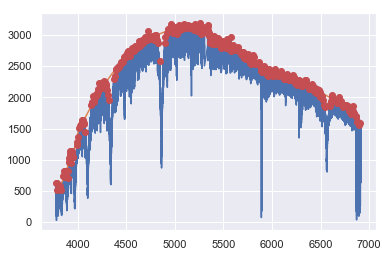

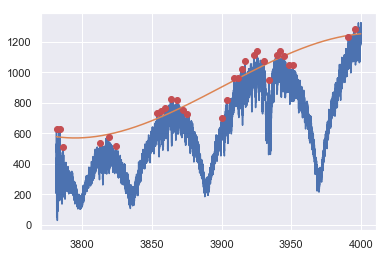

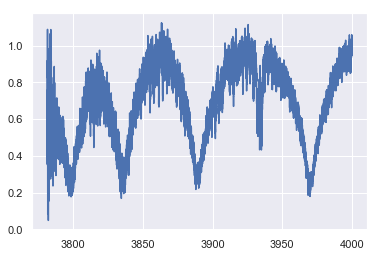

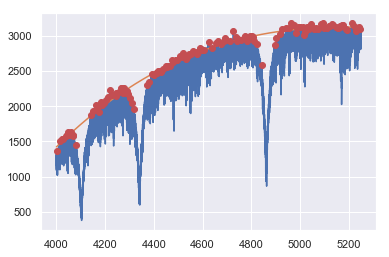

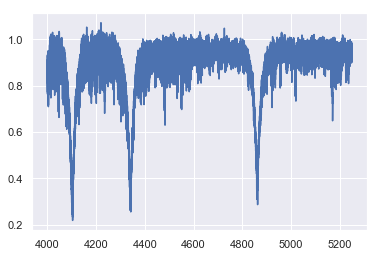

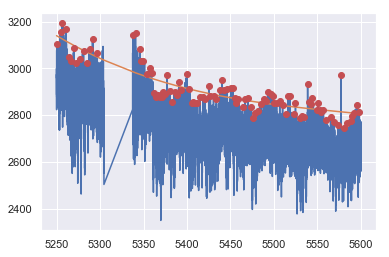

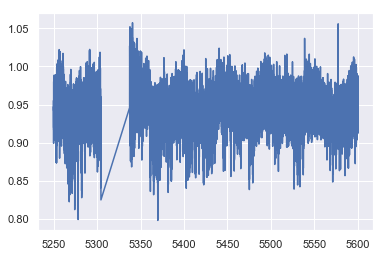

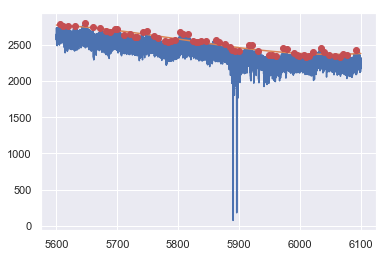

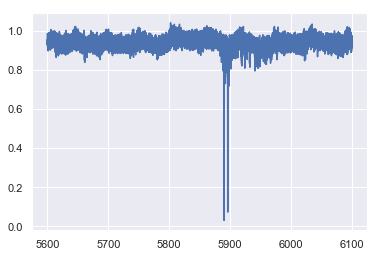

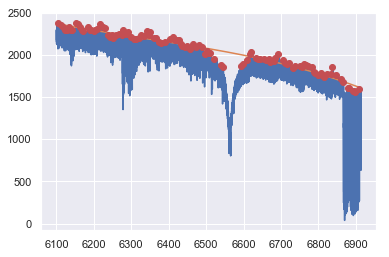

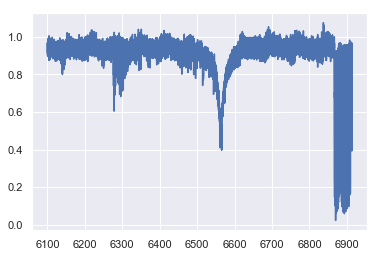

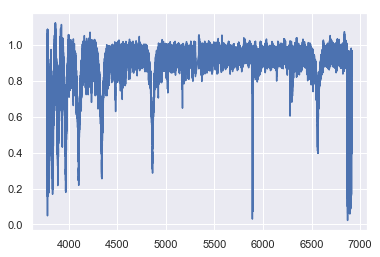

ADP.2014-09-23T11_05_33.363
[3781.86 3786.83 3812.45 3816.44 3826.59 3832.39 3835.21 3838.34 3847.
 3854.09 3856.49 3860.81 3863.6  3870.53 3875.56 3903.77 3911.86 3913.92
 3920.9  3923.47 3926.21 3928.94 3939.42 3944.69 3947.56 3953.06 3956.85
 3958.98 3961.56 3974.27 3988.37 3990.8  3993.33 3995.39 3999.93 4005.17
 4013.05 4021.29 4025.14 4030.4  4038.64 4043.26 4048.66 4060.93 4066.55
 4080.13 4142.13 4149.72 4157.2  4161.1  4175.89 4181.87 4191.37 4196.18
 4208.44 4213.9  4217.85 4233.94 4239.22 4257.67 4262.47 4269.04 4280.19
 4287.5  4292.57 4307.69 4312.49 4317.27 4365.36 4373.37 4380.73 4388.95
 4398.2  4405.53 4411.92 4424.81 4437.   4452.64 4458.44 4466.57 4477.22
 4485.57 4494.06 4502.33 4506.   4511.87 4529.15 4533.87 4542.33 4552.39
 4560.85 4570.35 4576.33 4583.24 4589.36 4596.45 4609.41 4613.84 4618.98
 4625.97 4631.59 4644.03 4648.52 4660.94 4670.4  4675.12 4684.46 4688.65
 4695.18 4709.42 4719.67 4724.01 4731.92 4744.45 4751.97 4762.18 4769.4
 4776.25 4783.57 4792.35 4

1
2
3
4


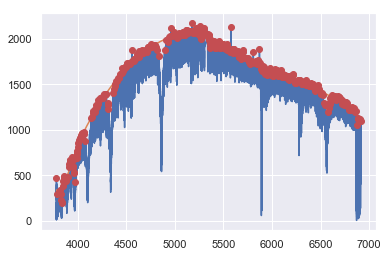

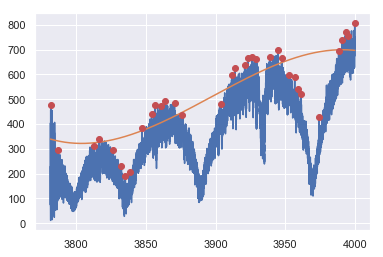

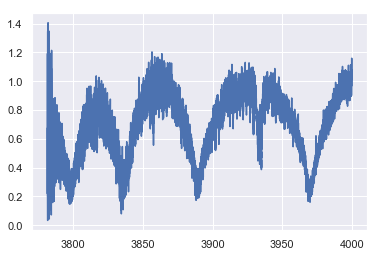

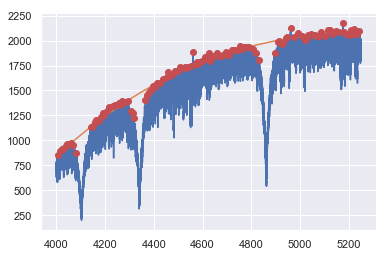

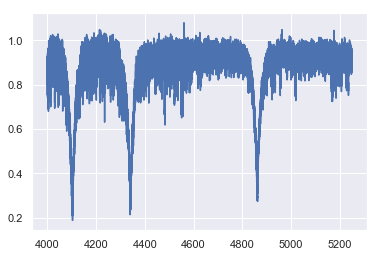

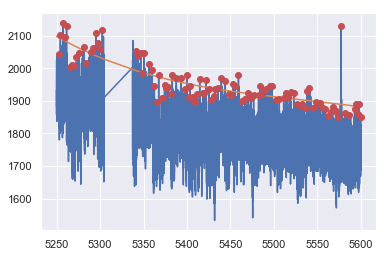

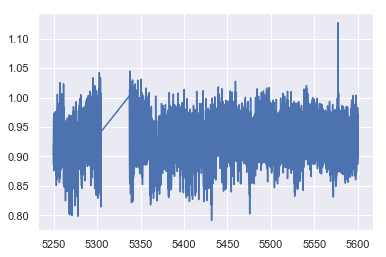

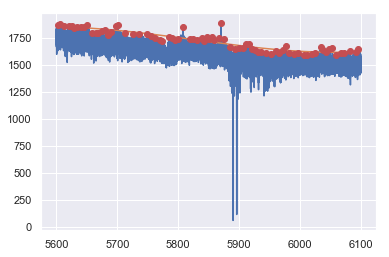

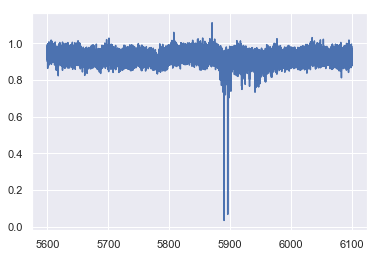

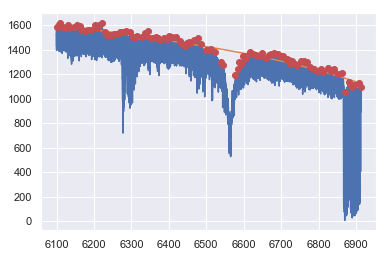

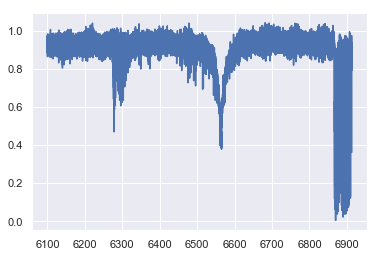

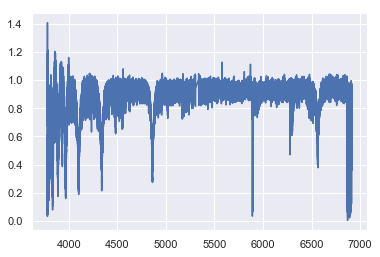

ADP.2014-09-23T11_05_33.390
[3782.93 3807.59 3810.79 3818.39 3823.3  3827.52 3832.33 3852.44 3854.86
 3858.24 3861.43 3864.54 3869.45 3874.81 3880.93 3886.36 3897.94 3903.
 3908.19 3910.77 3916.64 3923.24 3926.05 3928.29 3930.84 3941.46 3944.13
 3947.26 3950.38 3952.63 3959.79 3984.18 3989.19 3995.56 3999.75 4001.04
 4014.36 4020.73 4028.48 4041.89 4049.23 4054.03 4059.76 4065.91 4069.75
 4078.47 4126.32 4142.06 4147.45 4156.62 4163.48 4169.53 4176.36 4182.03
 4193.8  4207.57 4214.34 4218.2  4222.08 4229.48 4235.73 4243.1  4247.26
 4253.06 4258.4  4262.4  4266.53 4273.65 4281.16 4294.04 4300.03 4305.08
 4311.71 4328.84 4367.98 4379.82 4389.09 4401.85 4407.2  4410.75 4415.08
 4421.21 4427.72 4439.9  4446.25 4453.75 4462.15 4466.97 4476.49 4484.25
 4494.77 4499.18 4509.09 4518.4  4522.94 4529.46 4540.   4544.72 4553.85
 4558.5  4568.9  4574.77 4586.08 4599.11 4605.34 4613.92 4622.41 4632.37
 4636.06 4641.04 4644.85 4653.32 4657.34 4663.58 4674.4  4678.99 4685.86
 4692.75 4697.38 4705.7  

2
3
4


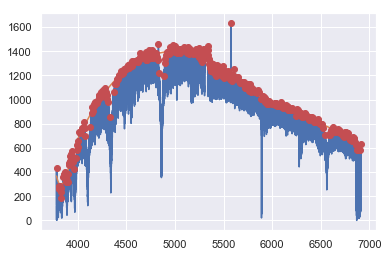

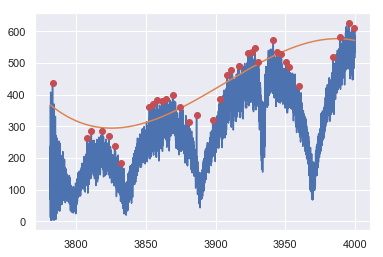

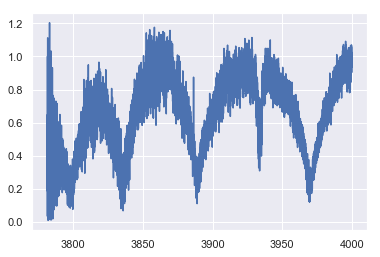

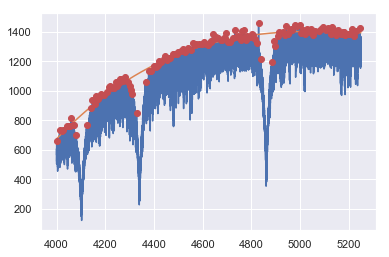

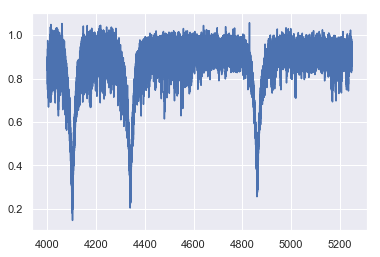

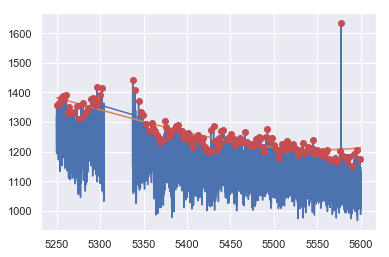

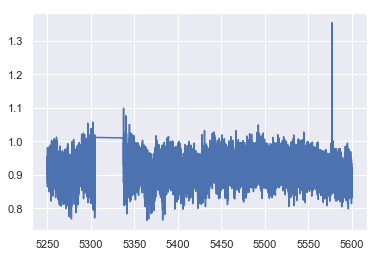

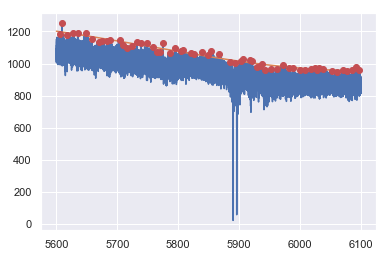

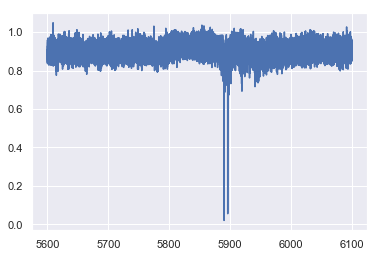

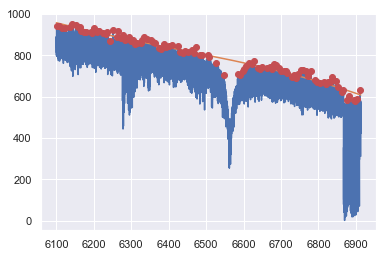

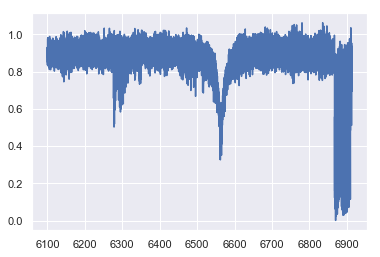

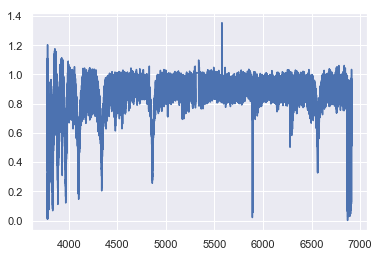

ADP.2014-09-23T11_05_47.177
[3781.46 3791.1  3806.37 3809.58 3811.66 3814.29 3819.29 3823.2  3826.91
 3831.09 3849.06 3853.19 3857.35 3862.1  3865.03 3868.79 3871.57 3874.85
 3879.68 3899.25 3902.34 3905.18 3912.44 3915.42 3917.98 3921.77 3924.24
 3927.37 3929.95 3937.15 3940.53 3943.57 3946.71 3954.64 3957.67 3960.2
 3981.42 3989.69 3993.71 3999.96 4003.78 4010.81 4016.84 4029.26 4038.28
 4042.53 4046.77 4050.73 4059.82 4070.36 4074.45 4079.11 4126.73 4139.27
 4146.91 4153.6  4162.97 4170.54 4180.72 4186.28 4190.48 4200.7  4208.2
 4214.54 4223.77 4230.85 4237.46 4244.8  4251.91 4255.64 4265.83 4278.43
 4291.79 4295.41 4304.99 4310.92 4316.53 4324.25 4367.08 4372.54 4378.73
 4383.   4392.69 4397.3  4406.52 4413.18 4420.88 4426.73 4431.91 4439.3
 4448.74 4453.01 4458.43 4467.83 4472.19 4478.07 4483.77 4492.4  4498.98
 4505.34 4511.96 4521.96 4532.65 4538.54 4552.66 4557.29 4561.77 4568.48
 4574.97 4587.   4591.23 4596.94 4602.06 4610.68 4618.29 4624.62 4628.65
 4644.51 4651.84 4659.69 4

2
3
4


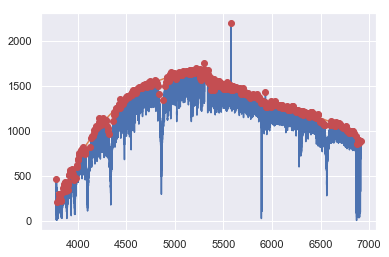

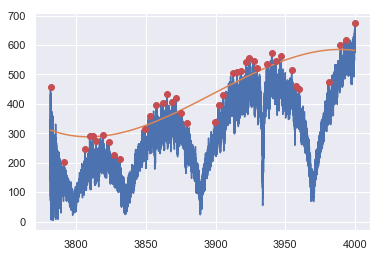

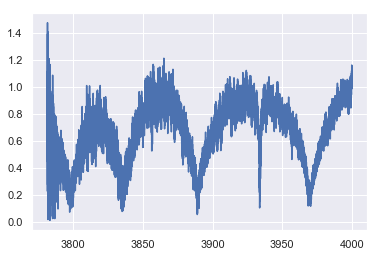

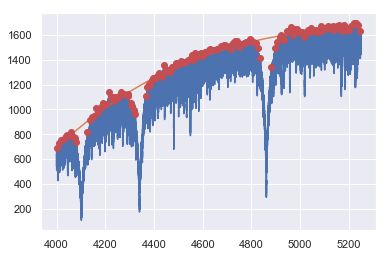

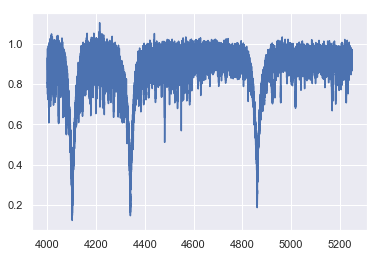

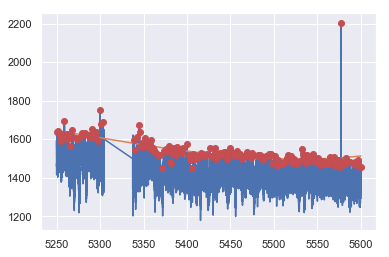

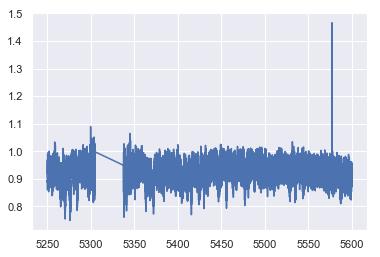

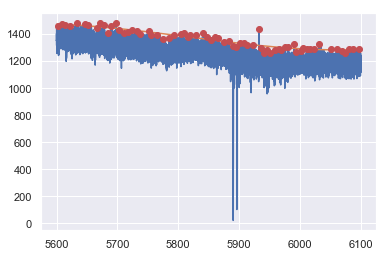

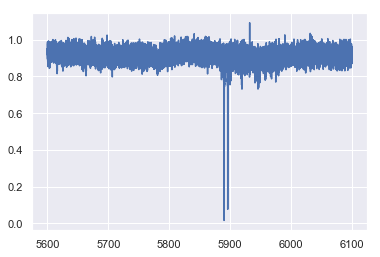

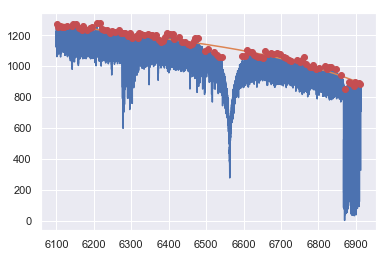

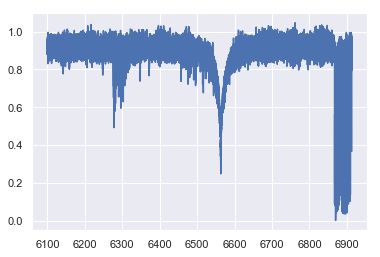

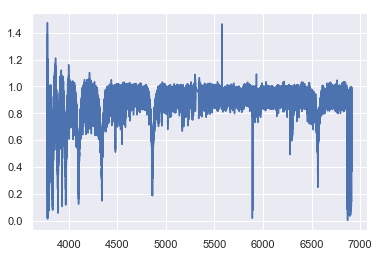

ADP.2014-09-23T11_05_54.643
[3781.98 3811.39 3818.17 3820.29 3826.12 3843.23 3848.41 3853.16 3858.12
 3861.65 3865.65 3869.64 3875.92 3880.19 3908.79 3912.5  3920.64 3928.1
 3931.01 3941.33 3943.85 3947.76 3952.65 3958.86 3992.83 3995.74 3999.7
 4000.78 4012.45 4020.98 4027.33 4038.68 4042.96 4048.93 4056.44 4061.03
 4065.73 4080.09 4126.54 4141.23 4152.83 4156.7  4164.22 4169.66 4176.28
 4182.12 4194.12 4207.72 4213.49 4221.08 4230.2  4240.64 4245.61 4253.13
 4263.68 4267.79 4275.55 4279.97 4287.81 4294.66 4305.48 4311.67 4373.19
 4379.62 4388.83 4393.07 4398.65 4403.22 4410.   4420.04 4424.3  4428.2
 4437.59 4446.67 4452.71 4461.85 4466.98 4478.54 4486.34 4493.38 4498.89
 4505.24 4511.59 4518.22 4523.25 4527.24 4531.5  4537.91 4543.82 4552.57
 4558.61 4570.46 4578.34 4586.1  4590.03 4594.44 4598.99 4603.62 4608.58
 4614.08 4623.01 4631.87 4641.43 4652.4  4657.77 4670.08 4676.91 4684.42
 4693.78 4697.53 4705.3  4712.79 4716.36 4720.35 4725.8  4729.37 4733.28
 4740.32 4744.27 4750.25 4

2
3
4


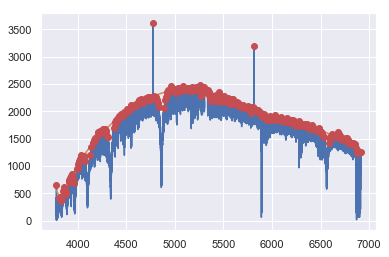

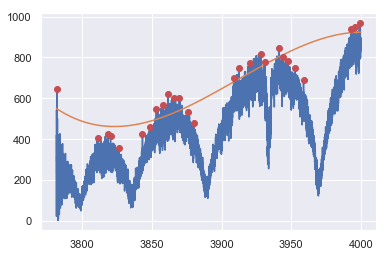

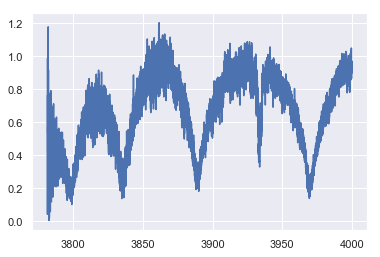

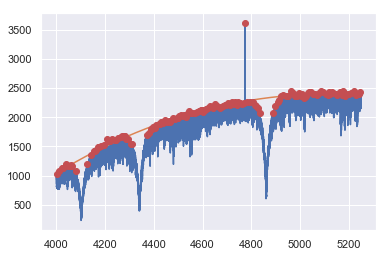

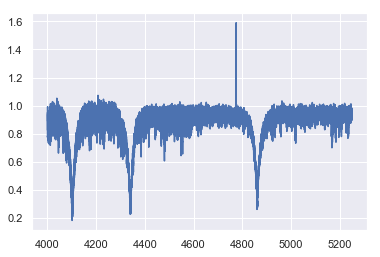

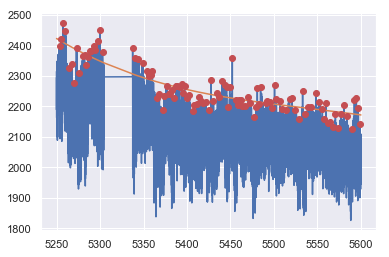

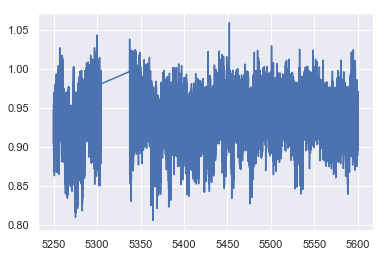

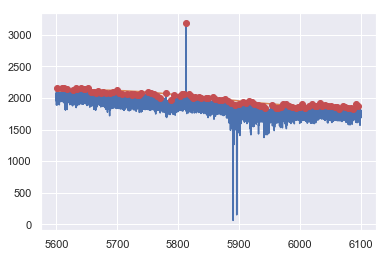

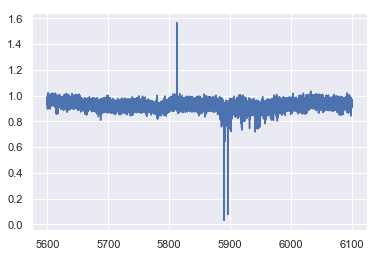

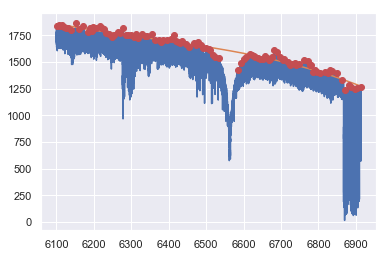

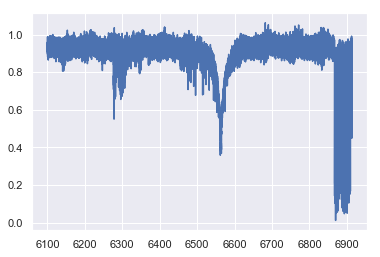

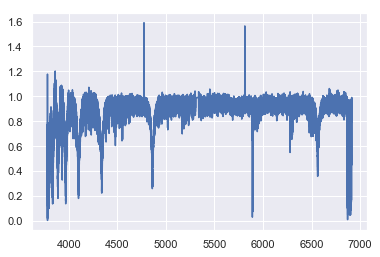

ADP.2014-09-23T11_06_07.137
[3782.65 3785.67 3791.45 3811.07 3817.82 3823.45 3826.1  3829.54 3848.51
 3853.87 3858.69 3861.77 3864.53 3868.4  3870.69 3875.68 3880.62 3912.44
 3914.73 3924.27 3929.61 3939.83 3946.41 3953.97 3958.54 3988.53 3996.06
 3999.28 4000.56 4011.68 4019.98 4027.03 4037.37 4043.15 4047.72 4057.7
 4065.72 4074.91 4131.07 4136.08 4141.63 4152.35 4158.14 4164.1  4170.27
 4175.88 4180.77 4186.23 4193.46 4201.14 4214.78 4219.55 4228.76 4234.87
 4241.61 4248.71 4257.34 4264.71 4269.54 4273.63 4277.21 4288.3  4292.71
 4297.97 4305.77 4311.55 4317.22 4321.18 4363.76 4378.12 4382.09 4387.07
 4393.37 4397.27 4407.11 4411.27 4420.91 4425.61 4440.22 4449.74 4453.28
 4463.71 4478.87 4486.12 4492.87 4506.47 4513.62 4519.25 4524.32 4532.46
 4538.47 4543.44 4548.24 4552.88 4562.48 4570.22 4573.85 4588.63 4594.08
 4598.68 4603.53 4609.01 4612.55 4623.23 4632.07 4638.33 4643.57 4653.69
 4663.22 4676.93 4682.59 4687.13 4696.92 4701.47 4705.8  4711.38 4717.46
 4723.66 4731.66 4750.23

2
3
4


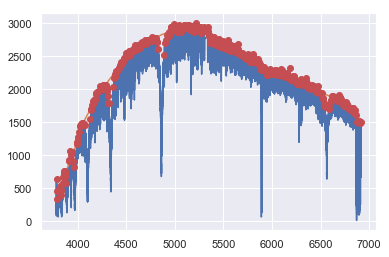

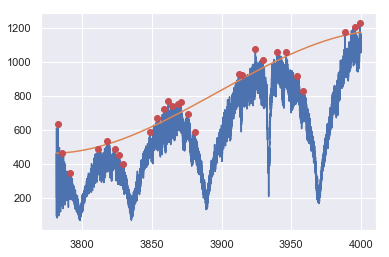

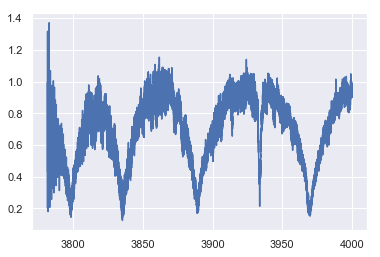

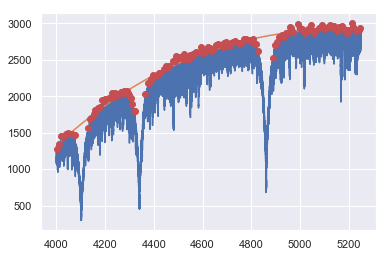

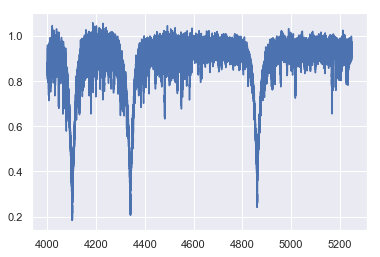

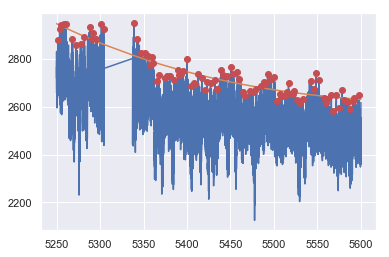

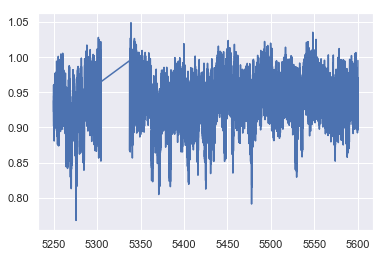

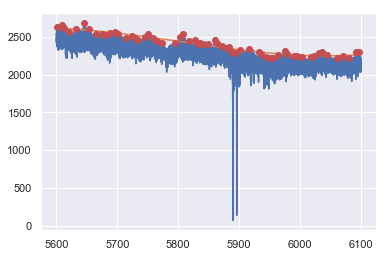

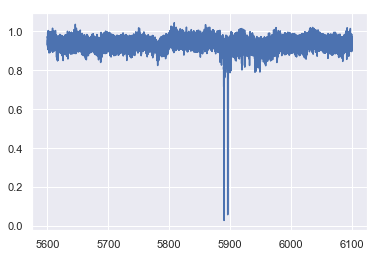

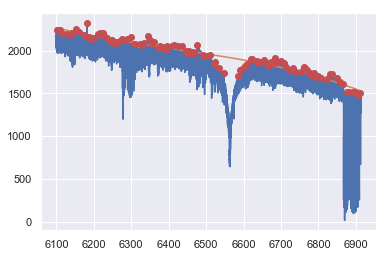

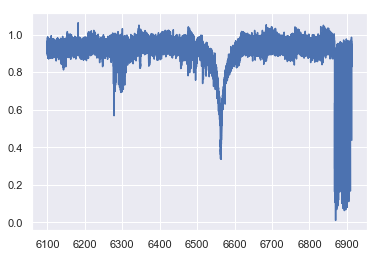

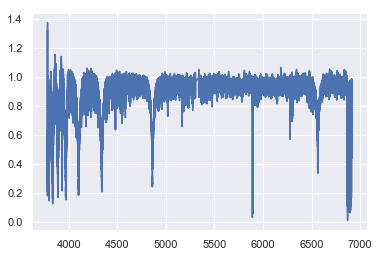

In [98]:
# for concatenating, plotting and saving girafee normalized data
# uncomment the saving line at the bottom when u are sure what u want to save

all_nams = []
max_nams = []

rfn_nams = []
rm_nams = []


for nams in range(len(wavelen)):#range(len(harps_objs['file'])):
    #print(nams)
    print(harps_objs['file'][nams+26][:-5])
    
    
    plt.figure()
    plt.plot(np.concatenate(wavelen[nams]), np.concatenate(flux[nams]))
    plt.plot(np.concatenate(wavelen[nams]), np.concatenate(pw[nams]))
    plt.plot(np.concatenate(wavelen[nams])[np.concatenate(ov[nams], axis=1)],
             np.concatenate(flux[nams])[np.concatenate(ov[nams], axis=1)],'ro')
    
    print(np.concatenate(wavelen[nams])[np.concatenate(ov[nams], axis=1)][0])
    print(np.concatenate(flux[nams])[np.concatenate(ov[nams], axis=1)][0])

    rfn, rm=[],[]
    for nami in range(len(wavelen[nams])):
        print(nami)
        plt.figure()
        plt.plot(wavelen[nams][nami], flux[nams][nami])
        plt.plot(wavelen[nams][nami], pw[nams][nami])
        plt.plot(np.concatenate(wavelen[nams])[ov[nams][nami][0]],
                 np.concatenate(flux[nams])[ov[nams][nami][0]], 'ro')
        
        plt.figure()
        plt.plot(wavelen[nams][nami], flux_norm[nams][nami])
        
        np.savetxt('/Users/jtorresh/Desktop/TODO/GradResearch/2014/'+harps_objs['file'][nams+26][:-5]+'part'+str(nami)+'raw_fit_nor.txt',
               np.asarray([wavelen[nams][nami], flux[nams][nami], pw[nams][nami], flux_norm[nams][nami]]).T)
        rfn.append('/Users/jtorresh/Desktop/TODO/GradResearch/2014/'+harps_objs['file'][nams+26][:-5]+'part'+str(nami)+'raw_fit_nor.txt')
        
        
        
        np.savetxt('/Users/jtorresh/Desktop/TODO/GradResearch/2014/'+harps_objs['file'][nams+26][:-5]+'part'+str(nami)+'relmax.txt',
              np.asarray([np.concatenate(wavelen[nams])[ov[nams][nami][0]],
                 np.concatenate(flux[nams])[ov[nams][nami][0]]]).T)
        
        rm.append('/Users/jtorresh/Desktop/TODO/GradResearch/2014/'+harps_objs['file'][nams+26][:-5]+'part'+str(nami)+'relmax.txt')
        
              
    rfn_nams.append(rfn)
    rm_nams.append(rm)
    
    plt.figure()
    plt.plot(np.concatenate(wavelen[nams]), np.concatenate(flux_norm[nams]))
    plt.show()
    
    
    
    np.savetxt('/Users/jtorresh/Desktop/TODO/GradResearch/2014/'+harps_objs['file'][nams+26][:-5]+'all.txt', 
               np.asarray([np.concatenate(wavelen[nams]),
                           np.concatenate(flux[nams]),
                           np.concatenate(flux_norm[nams]),
                         np.concatenate(pw[nams])]).T)

    all_nams.append('/Users/jtorresh/Desktop/TODO/GradResearch/2014/'+harps_objs['file'][nams+26][:-5]+'all.txt')
    
    
    np.savetxt('/Users/jtorresh/Desktop/TODO/GradResearch/2014/'+harps_objs['file'][nams+26][:-5]+'maxs.txt', 
               np.asarray([np.concatenate(wavelen[nams])[np.concatenate(ov[nams], axis=1)][0],
             np.concatenate(flux[nams])[np.concatenate(ov[nams], axis=1)][0]]).T)
    
    
    max_nams.append('/Users/jtorresh/Desktop/TODO/GradResearch/2014/'+harps_objs['file'][nams+26][:-5]+'maxs.txt')
    
    
    

In [99]:
all_nams, max_nams

(['/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_30.717all.txt',
  '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_33.363all.txt',
  '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_33.390all.txt',
  '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_47.177all.txt',
  '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_54.643all.txt',
  '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_06_07.137all.txt'],
 ['/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_30.717maxs.txt',
  '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_33.363maxs.txt',
  '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_33.390maxs.txt',
  '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_47.177maxs.txt',
  '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_54.643maxs.txt',
  '/Users/jtorresh/Desktop/TODO/GradR

In [100]:
rfn_nams, rm_nams

([['/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_30.717part0raw_fit_nor.txt',
   '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_30.717part1raw_fit_nor.txt',
   '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_30.717part2raw_fit_nor.txt',
   '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_30.717part3raw_fit_nor.txt',
   '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_30.717part4raw_fit_nor.txt'],
  ['/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_33.363part0raw_fit_nor.txt',
   '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_33.363part1raw_fit_nor.txt',
   '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_33.363part2raw_fit_nor.txt',
   '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_33.363part3raw_fit_nor.txt',
   '/Users/jtorresh/Desktop/TODO/GradResearch/2014/ADP.2014-09-23T11_05_33.363part4raw_fit

## double check that all made and saved files above are good (as a whole and in parts):

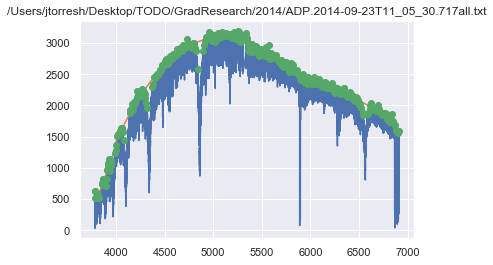

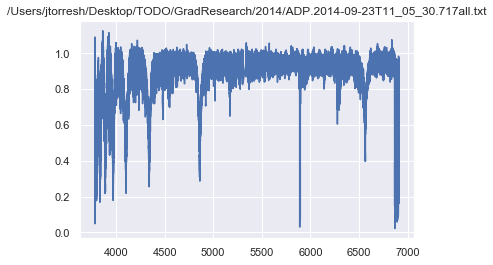

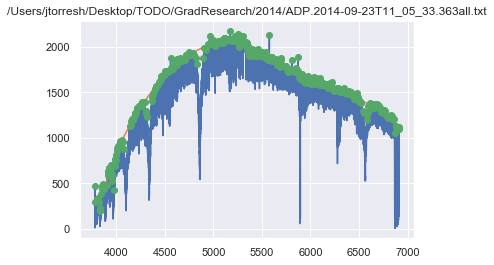

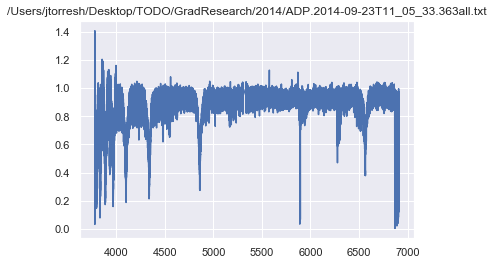

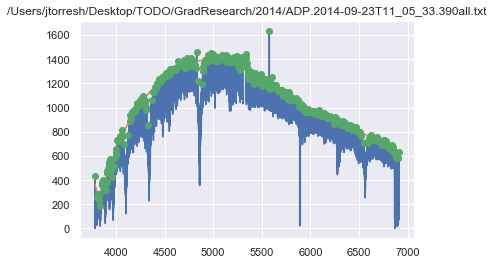

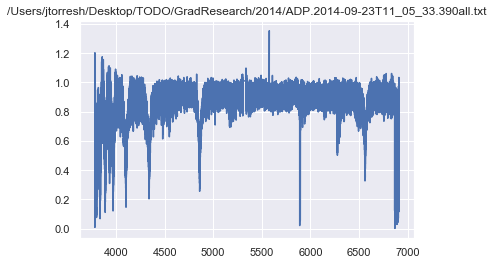

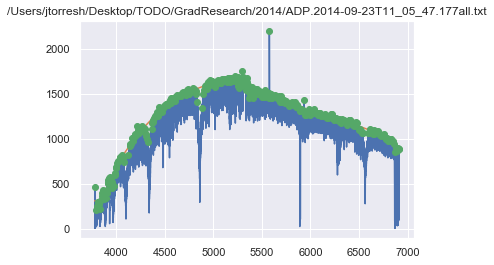

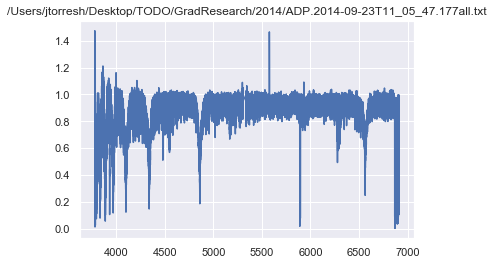

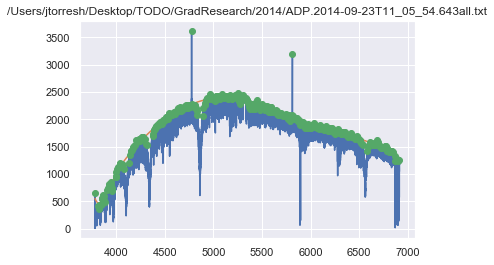

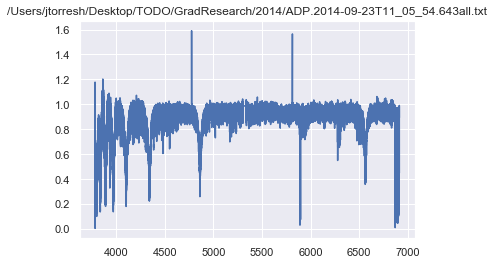

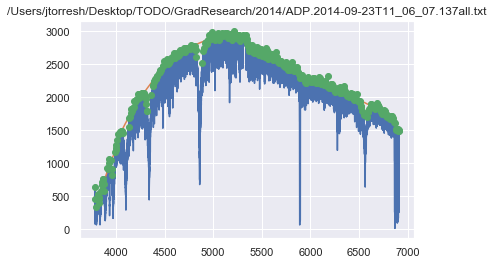

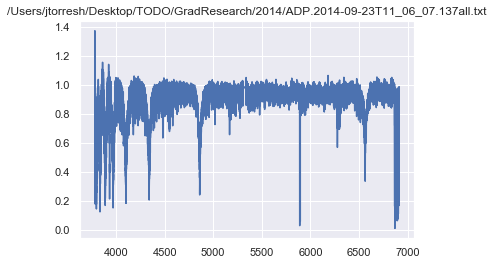

In [101]:
for ii in range(len(all_nams)):
    all_dt = np.loadtxt(all_nams[ii],usecols=(0,1,2,3),unpack=True)
    maxs_dt = np.loadtxt(max_nams[ii], usecols=(0,1), unpack=True)
    plt.figure()
    plt.title(all_nams[ii])
    plt.plot(all_dt[0],all_dt[1])
    plt.plot(all_dt[0],all_dt[3])
    plt.plot(maxs_dt[0],maxs_dt[1],'go')
    plt.figure()
    plt.title(all_nams[ii])
    plt.plot(all_dt[0],all_dt[2])
    plt.show()


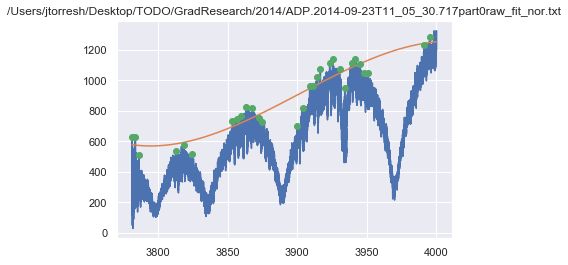

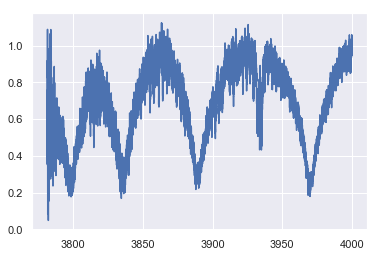

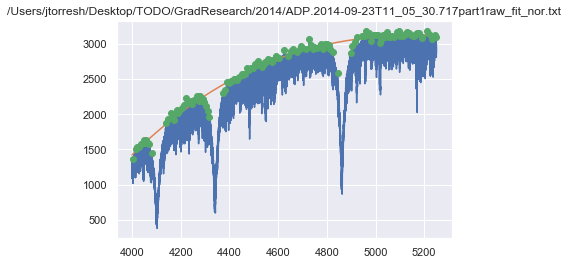

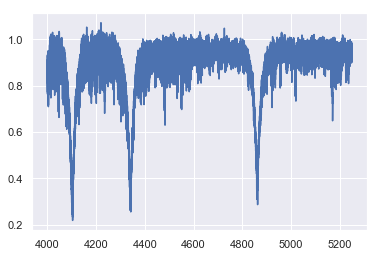

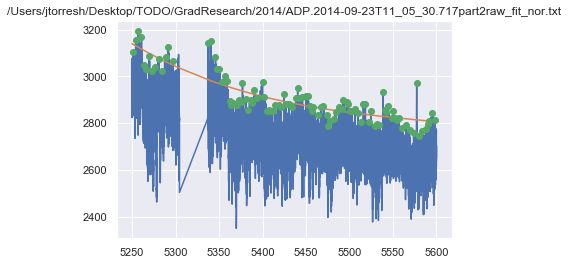

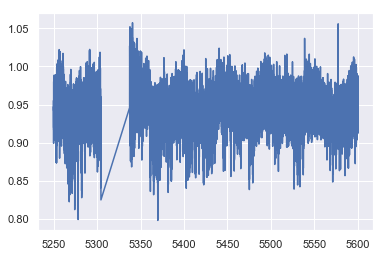

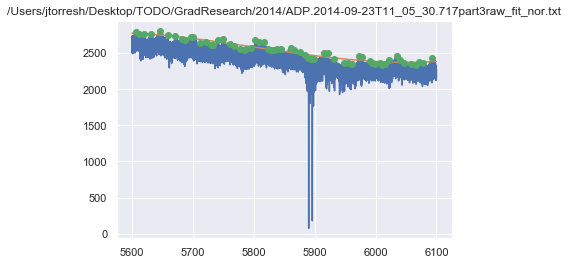

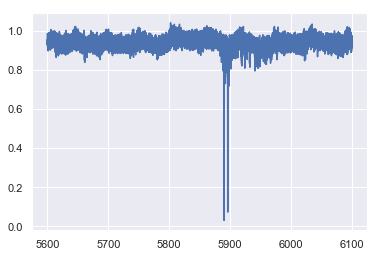

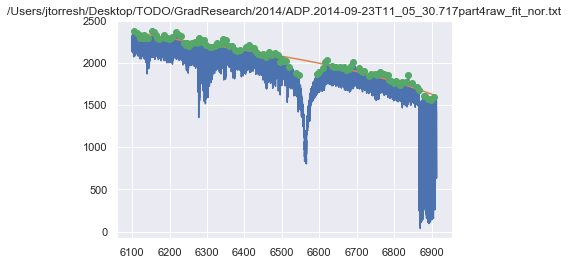

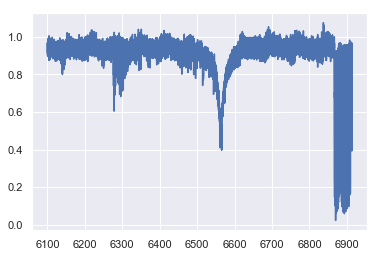

&&&&&&&&&&&&&&


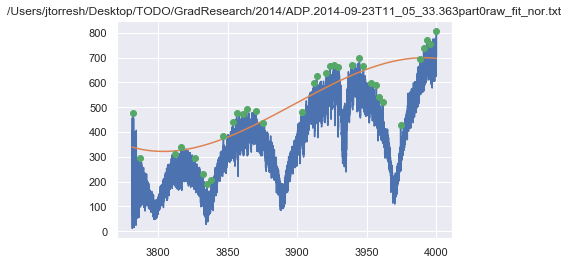

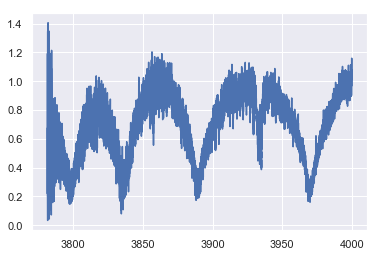

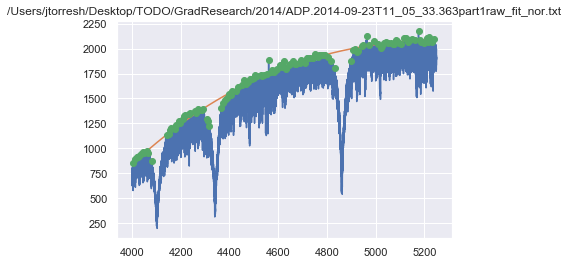

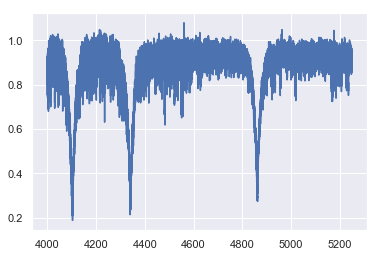

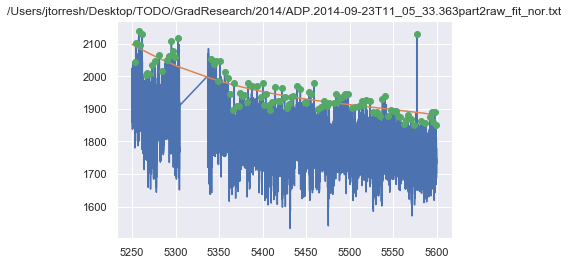

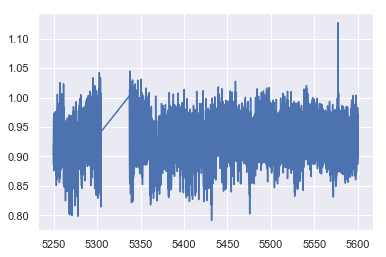

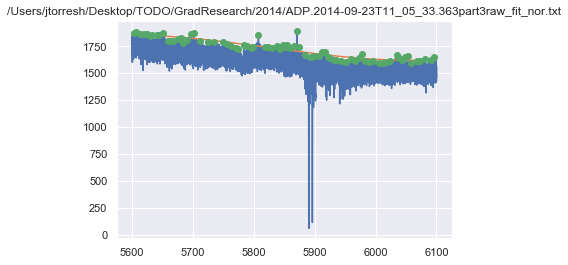

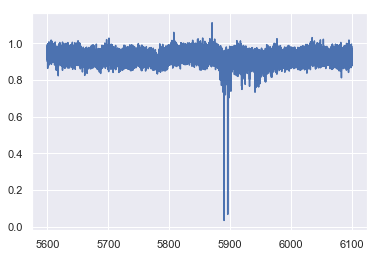

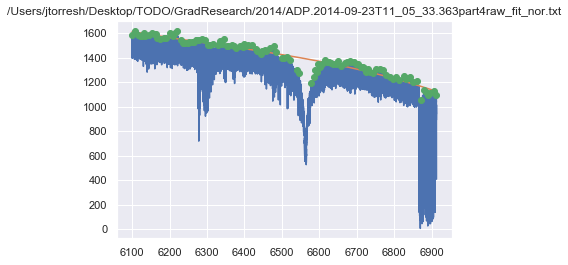

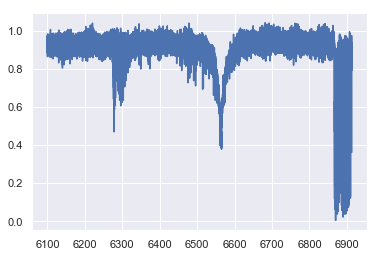

&&&&&&&&&&&&&&


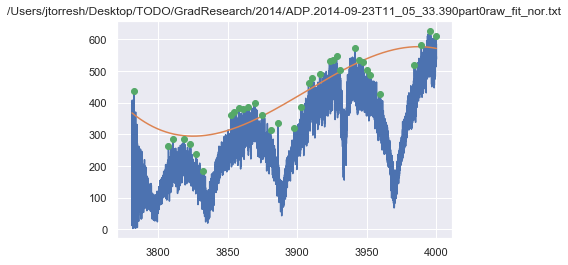

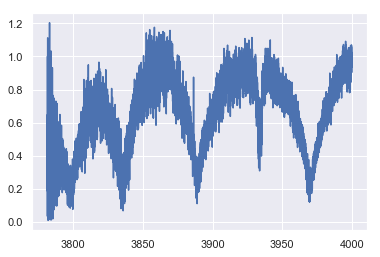

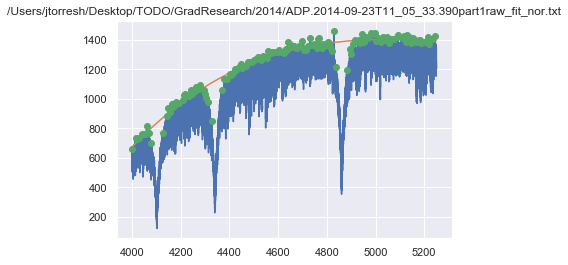

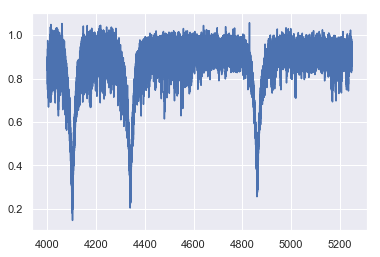

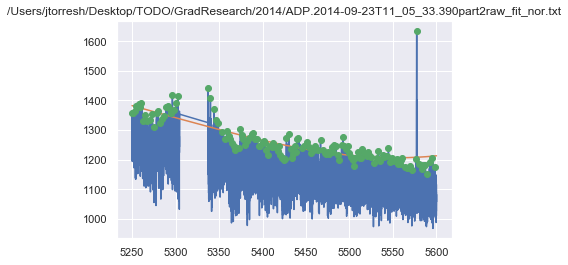

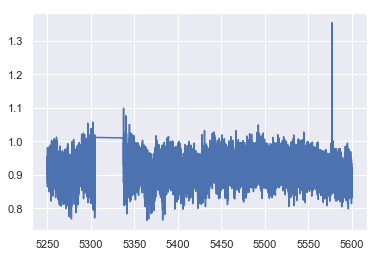

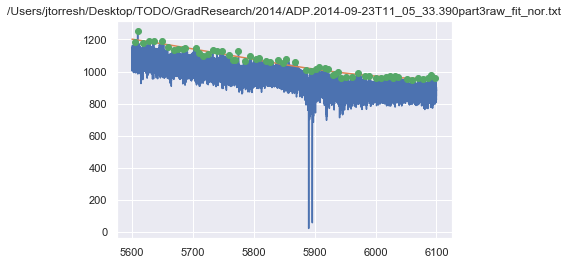

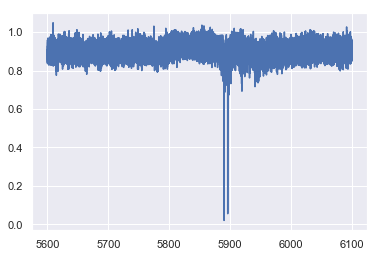

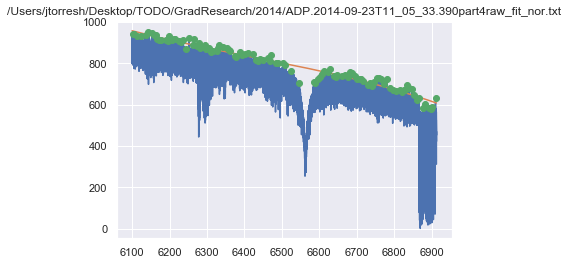

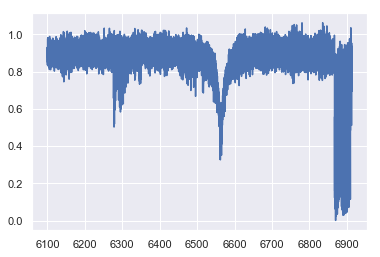

&&&&&&&&&&&&&&


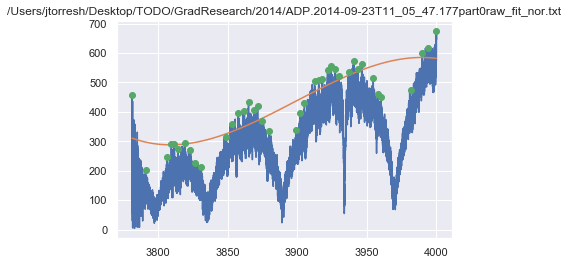

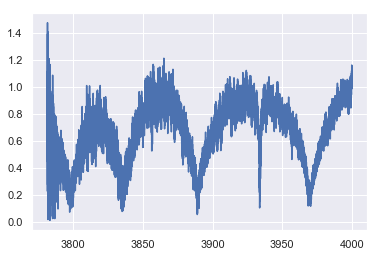

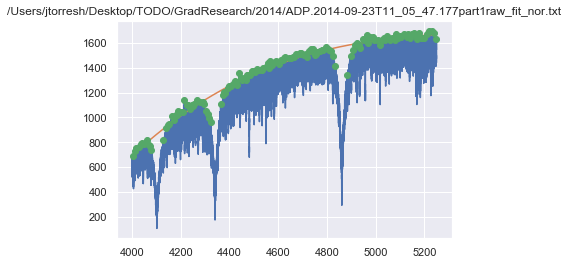

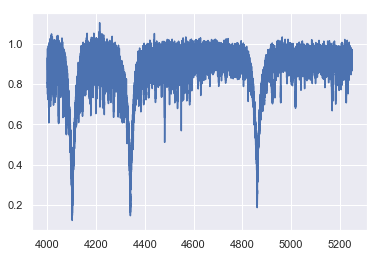

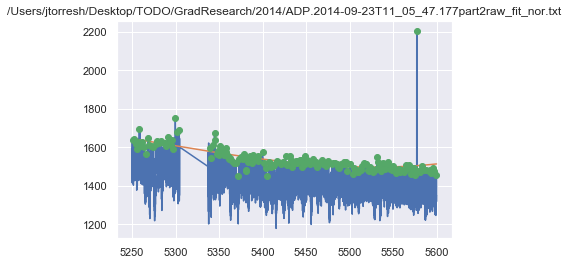

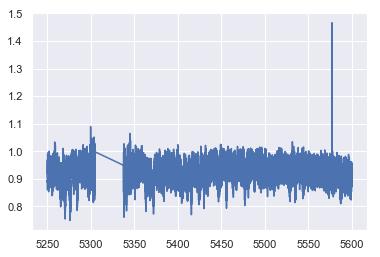

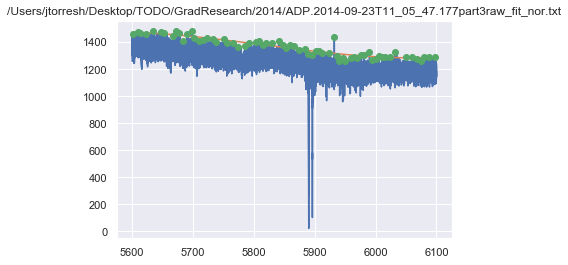

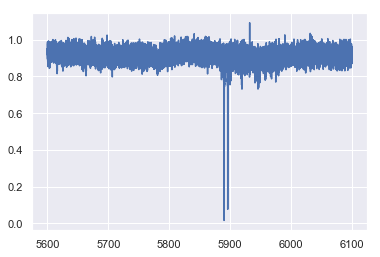

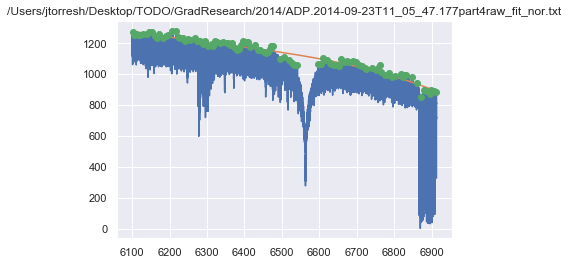

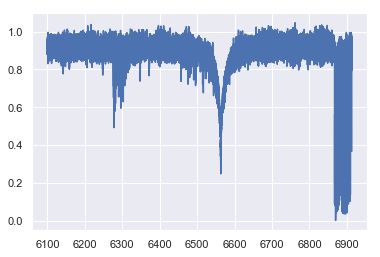

&&&&&&&&&&&&&&


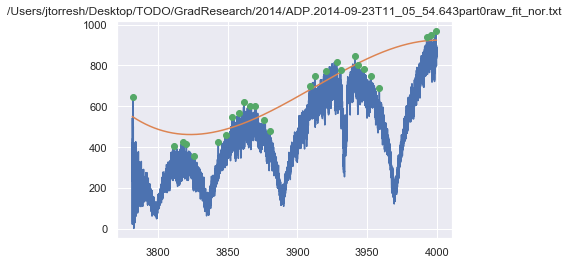

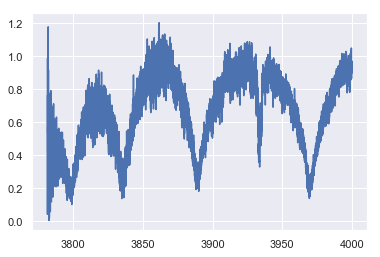

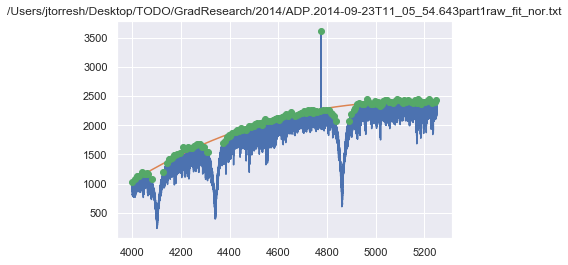

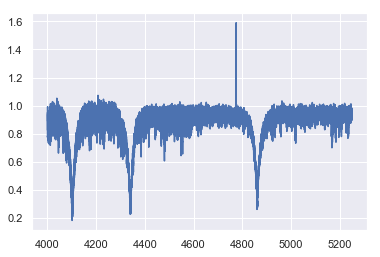

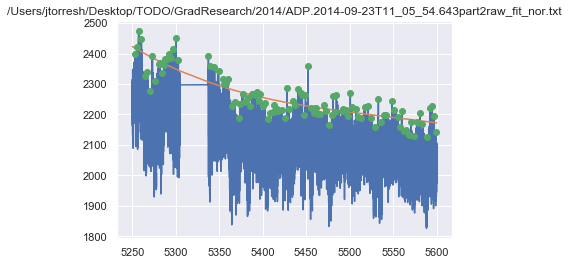

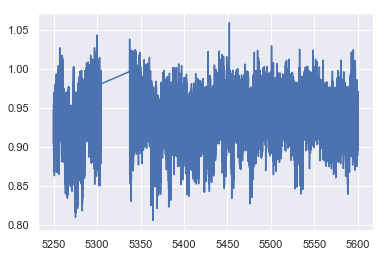

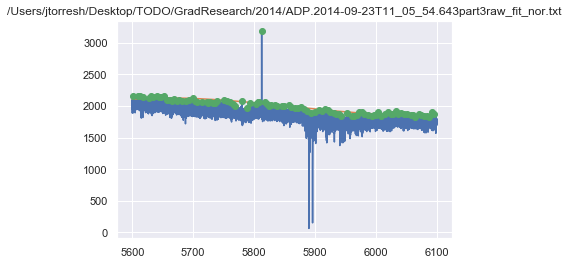

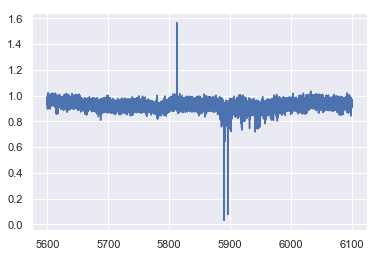

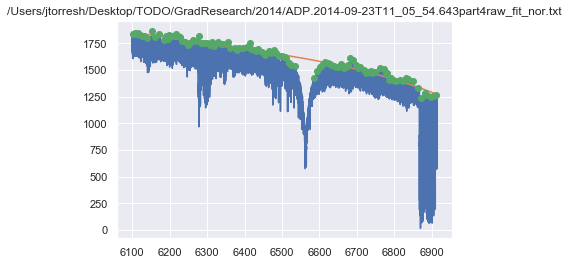

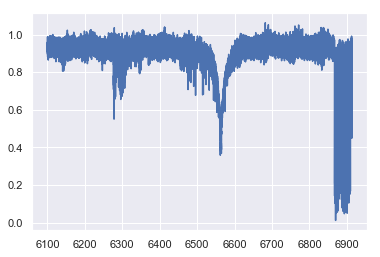

&&&&&&&&&&&&&&


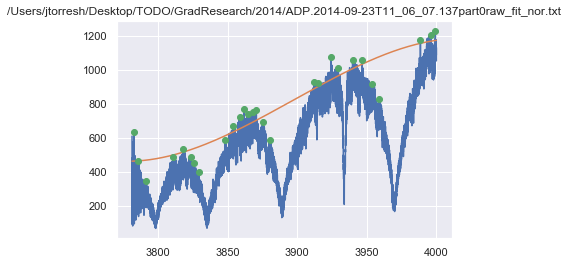

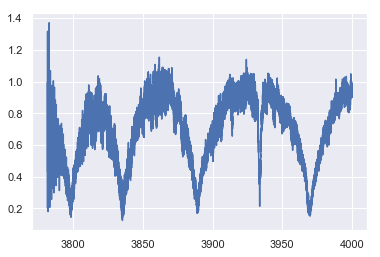

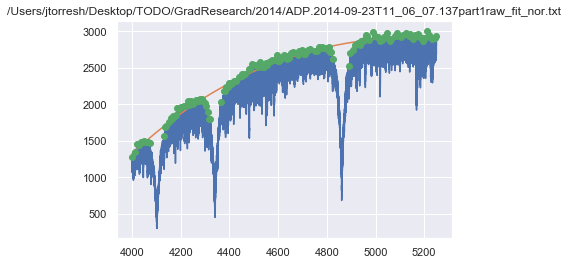

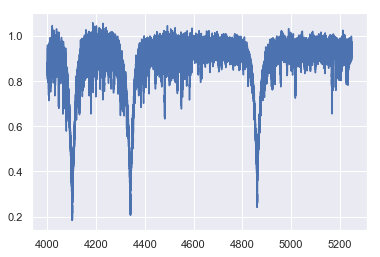

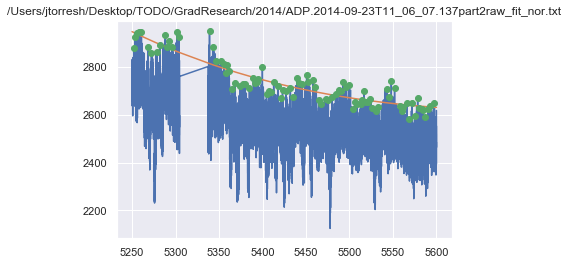

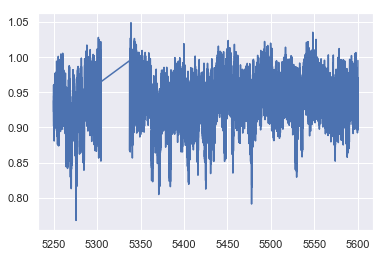

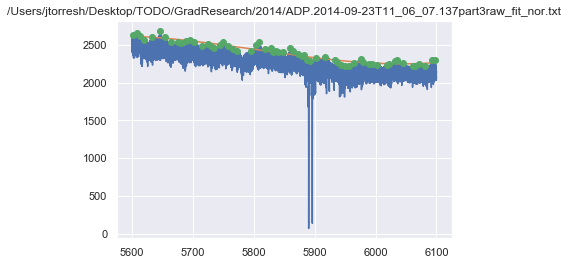

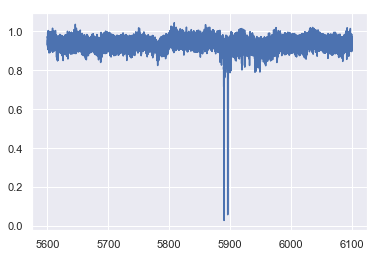

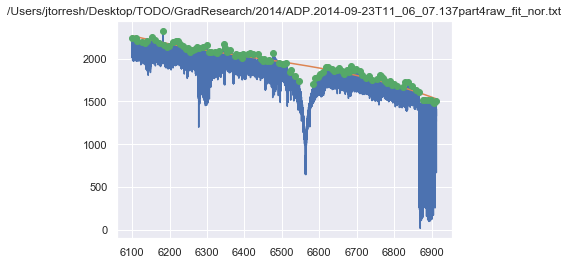

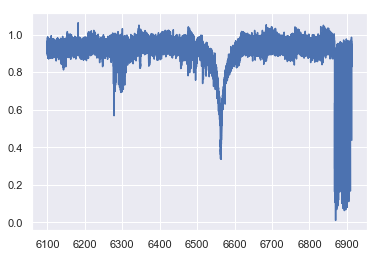

&&&&&&&&&&&&&&


In [102]:
for i in range(len(rfn_nams)):
    for ii in range(len(rfn_nams[i])):
        rfn_dt = np.loadtxt(rfn_nams[i][ii],usecols=(0,1,2,3), unpack=True)
        rm_dt = np.loadtxt(rm_nams[i][ii],usecols=(0,1), unpack=True)
        plt.figure()
        plt.title(rfn_nams[i][ii])
        plt.plot(rfn_dt[0],rfn_dt[1])
        plt.plot(rfn_dt[0],rfn_dt[2])
        
        plt.plot(rm_dt[0],rm_dt[1],'go')
        plt.figure()
        plt.plot(rfn_dt[0], rfn_dt[3])
        plt.show()
        
        
    print('&&&&&&&&&&&&&&')

In [111]:
l=os.listdir('/Users/jtorresh/Desktop/TODO/GradResearch/2014/')
txt_all = []
txt_maxs = []
txt_raw_fit_nor =[]
txt_rel_max = []
for i in range(len(l)):
    print(i)
    if l[i].endswith('all.txt'):
        txt_all.append(l[i])
    if l[i].endswith('maxs.txt'):
        txt_maxs.append(l[i])
    if l[i].endswith('relmax.txt'):
        txt_rel_max.append(l[i])
    if l[i].endswith('raw_fit_nor.txt'):
        txt_raw_fit_nor.append(l[i])
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [112]:
txt_all, txt_maxs, txt_raw_fit_nor, txt_rel_max

(['ADP.2014-09-23T11_05_33.390all.txt',
  'ADP.2014-09-23T11_02_55.860all.txt',
  'ADP.2014-09-23T11_05_33.363all.txt',
  'ADP.2014-09-23T11_00_45.350all.txt',
  'ADP.2014-09-23T11_04_31.313all.txt',
  'ADP.2014-09-23T11_01_13.437all.txt',
  'ADP.2014-09-23T11_04_25.993all.txt',
  'ADP.2014-09-23T11_03_52.867all.txt',
  'ADP.2014-09-23T11_03_43.473all.txt',
  'ADP.2014-09-23T11_04_10.497all.txt',
  'ADP.2014-09-23T11_01_52.180all.txt',
  'ADP.2014-09-23T11_01_41.897all.txt',
  'ADP.2014-09-23T11_01_34.467all.txt',
  'ADP.2014-09-23T11_04_08.257all.txt',
  'ADP.2014-09-23T11_02_44.973all.txt',
  'ADP.2014-09-23T11_05_14.037all.txt',
  'ADP.2014-09-23T11_01_17.427all.txt',
  'ADP.2014-09-23T11_05_54.643all.txt',
  'ADP.2014-09-23T11_05_47.177all.txt',
  'ADP.2014-09-23T11_01_49.103all.txt',
  'ADP.2014-09-23T11_00_48.230all.txt',
  'ADP.2014-09-23T11_01_10.970all.txt',
  'ADP.2014-09-23T11_04_21.897all.txt',
  'ADP.2014-09-23T11_04_00.803all.txt',
  'ADP.2014-09-23T11_05_30.717all.txt',


In [113]:
len(txt_all)+len(txt_maxs)+len(txt_raw_fit_nor)+len(txt_rel_max)


384

In [120]:
H=pd.read_csv('/Users/jtorresh/Desktop/TODO/GradResearch/2014/my19obs_harps2019.csv')
H

Unnamed: 0                              file        ID         RA  \
0            1  ADP.2014-09-23T11_00_48.230.fits  V392-Car  119.54486   
1            2  ADP.2014-09-23T11_01_10.970.fits  V392-Car  119.54560   
2            3  ADP.2014-09-23T11_01_13.437.fits  V392-Car  119.54825   
3            5  ADP.2014-09-23T11_01_34.467.fits  V392-Car  119.54562   
4            6  ADP.2014-09-23T11_01_41.897.fits  V392-Car  119.54887   
5            7  ADP.2014-09-23T11_01_49.103.fits  V392-Car  119.54821   
6            8  ADP.2014-09-23T11_01_52.180.fits  V392-Car  119.54745   
7           11  ADP.2014-09-23T11_02_44.973.fits  V392-Car  119.54783   
8           13  ADP.2014-09-23T11_03_32.913.fits  V392-Car  119.54783   
9           14  ADP.2014-09-23T11_03_43.473.fits  V392-Car  119.54868   
10          15  ADP.2014-09-23T11_03_52.867.fits  V392-Car  119.54788   
11          16  ADP.2014-09-23T11_03_53.490.fits  V392-Car  119.54859   
12          17  ADP.2014-09-23T11_04_00.803.fits  V392-Car  119.54509   
13          18  ADP.2014-09-23T11_04_08.257.fits  V392-Car  119.54449   
14          20  ADP.2014-09-23T11_04_21.177.fits  V392-Car  119.54484   
15          21  ADP.2014-09-23T11_04_21.897.fits  V392-Car  119.54832   
16          26  ADP.2014-09-23T11_05_30.717.fits  V392-Car  119.54815   
17          30  ADP.2014-09-23T11_05_54.643.fits  V392-Car  119.54554   
18          31  ADP.2014-09-23T11_06_07.137.fits  V392-Car  119.54630   

         DEC  EXPTIME       MJD-OBS       MJD_END  WAVELMIN  WAVELMAX    SNR  \
0  -60.86651    200.0  54925.981809  54925.984123   378.141   691.310  38.75   
1  -60.86688    200.0  54928.975892  54928.978207   378.143   691.310  54.70   
2  -60.86640    200.0  54926.045222  54926.047537   378.141   691.310  34.90   
3  -60.86664    200.0  54927.104750  54927.107064   378.143   691.310  39.35   
4  -60.86647    200.0  54928.057265  54928.059580   378.140   691.310  52.15   
5  -60.86654    200.0  54928.022380  54928.024694   378.140   691.310  51.60   
6  -60.86667    200.0  54925.025110  54925.027425   378.141   691.312  50.35   
7  -60.86637    200.0  54927.016090  54927.018405   378.142   691.310  44.40   
8  -60.86685    200.0  54929.016683  54929.018998   378.143   691.309  49.15   
9  -60.86671    200.0  54925.063476  54925.065791   378.141   691.310  48.70   
10 -60.86661    300.0  54926.082351  54926.085823   378.141   691.310  44.80   
11 -60.86640    200.0  54927.055944  54927.058259   378.142   691.310  49.20   
12 -60.86657    200.0  54923.985613  54923.987928   378.140   691.311  57.40   
13 -60.86671    200.0  54924.978368  54924.980683   378.141   691.312  40.60   
14 -60.86641    200.0  54926.975530  54926.977845   378.142   691.310  51.20   
15 -60.86696    200.0  54924.124018  54924.126333   378.139   691.312  55.50   
16 -60.86644    200.0  54924.037318  54924.039633   378.139   691.312  56.85   
17 -60.86703    200.0  54929.094816  54929.097131   378.143   691.309  49.80   
18 -60.86657    200.0  54927.988707  54927.991022   378.140   691.310  55.20   

                   DATE-OBS      UTC INSTRUME TELESCOP  
0   2009-04-04T23:33:48.263  84822.0    HARPS  ESO-3.6  
1   2009-04-07T23:25:17.111  84311.0    HARPS  ESO-3.6  
2   2009-04-05T01:05:07.203   3901.0    HARPS  ESO-3.6  
3   2009-04-06T02:30:50.363   9044.0    HARPS  ESO-3.6  
4   2009-04-07T01:22:27.676   4941.0    HARPS  ESO-3.6  
5   2009-04-07T00:32:13.601   1927.0    HARPS  ESO-3.6  
6   2009-04-04T00:36:09.491   2163.0    HARPS  ESO-3.6  
7   2009-04-06T00:23:10.196   1384.0    HARPS  ESO-3.6  
8   2009-04-08T00:24:01.425   1435.0    HARPS  ESO-3.6  
9   2009-04-04T01:31:24.312   5478.0    HARPS  ESO-3.6  
10  2009-04-05T01:58:35.108   7109.0    HARPS  ESO-3.6  
11  2009-04-06T01:20:33.573   4827.0    HARPS  ESO-3.6  
12  2009-04-02T23:39:16.947  85151.0    HARPS  ESO-3.6  
13  2009-04-03T23:28:50.980  84525.0    HARPS  ESO-3.6  
14  2009-04-05T23:24:45.785  84280.0    HARPS  ESO-3.6  
15  2009-04-03T02:58:35.180  1

In [122]:
H['file'][0:3]

0    ADP.2014-09-23T11_00_48.230.fits
1    ADP.2014-09-23T11_01_10.970.fits
2    ADP.2014-09-23T11_01_13.437.fits
Name: file, dtype: object

ADP.2014-09-23T11_00_48.230


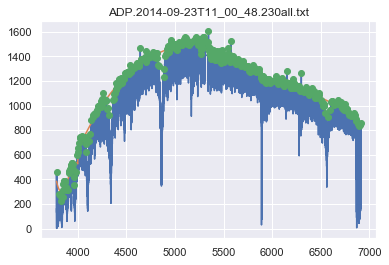

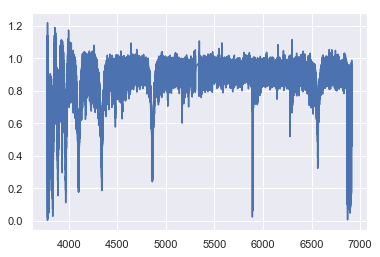

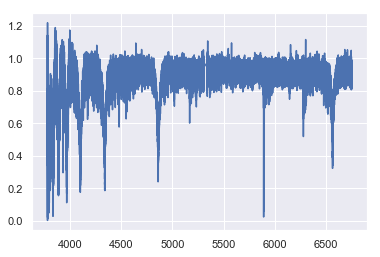

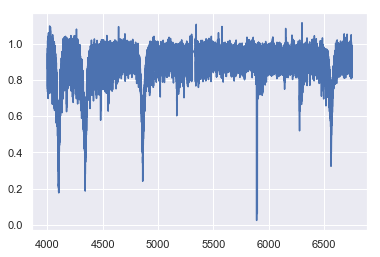

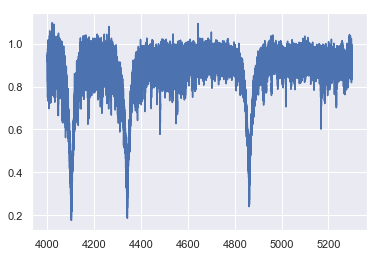

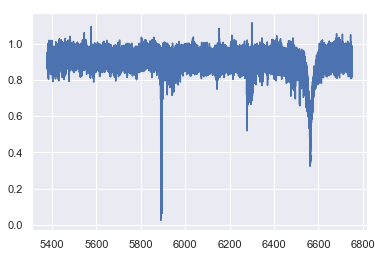

ADP.2014-09-23T11_01_10.970


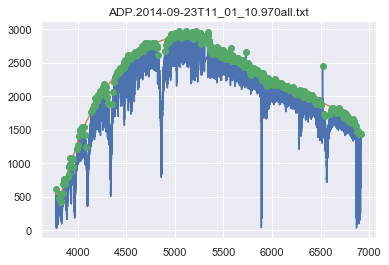

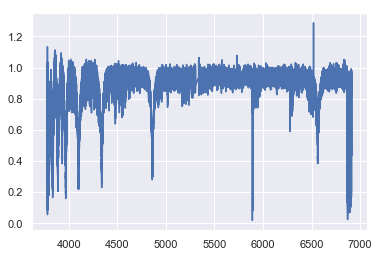

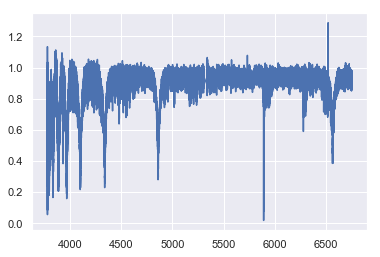

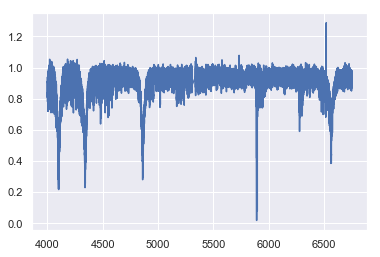

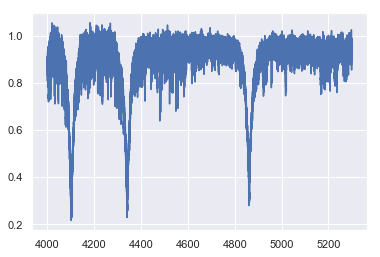

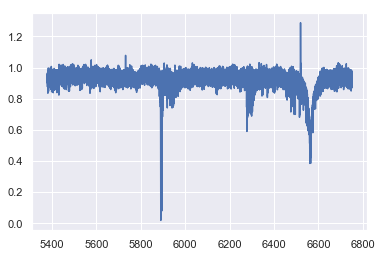

ADP.2014-09-23T11_01_13.437


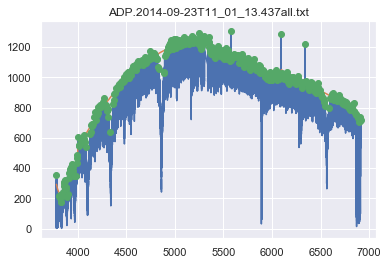

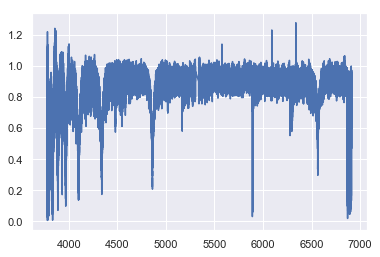

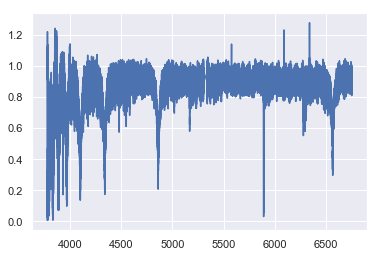

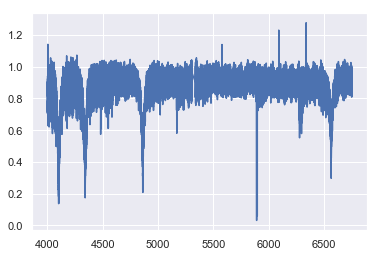

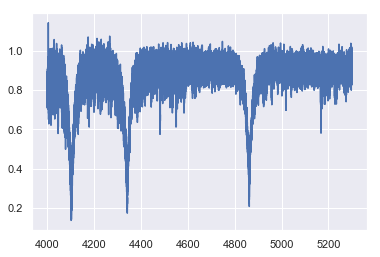

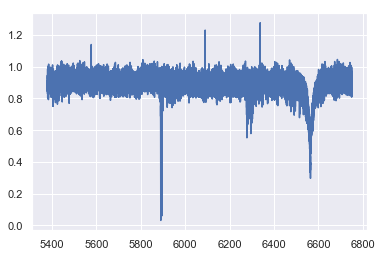

ADP.2014-09-23T11_01_34.467


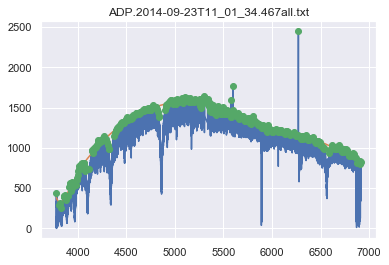

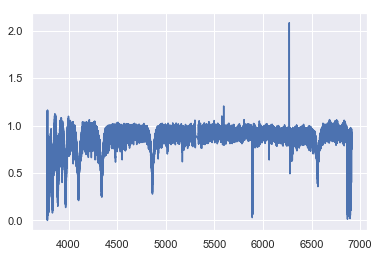

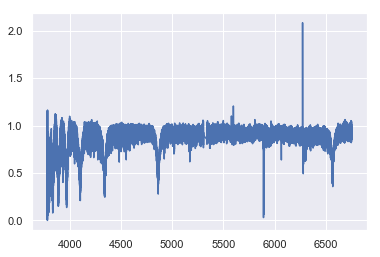

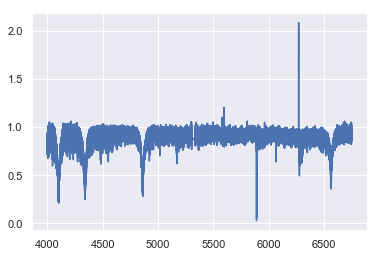

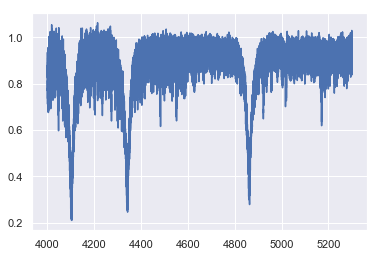

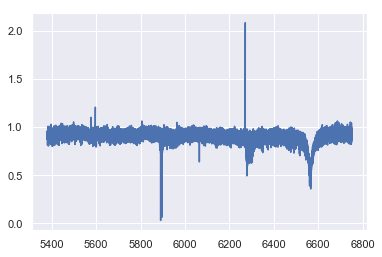

ADP.2014-09-23T11_01_41.897


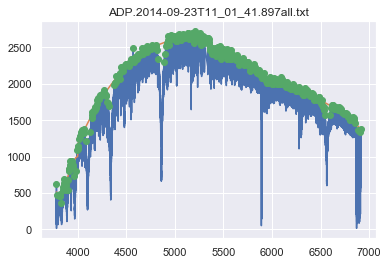

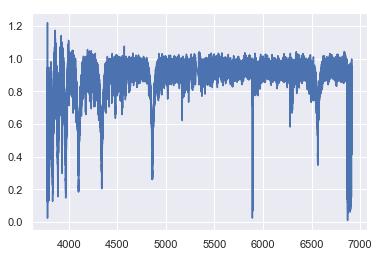

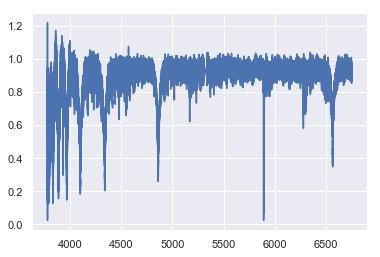

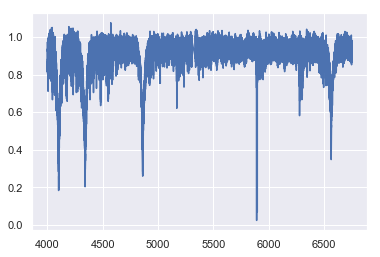

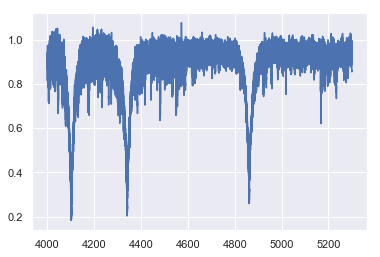

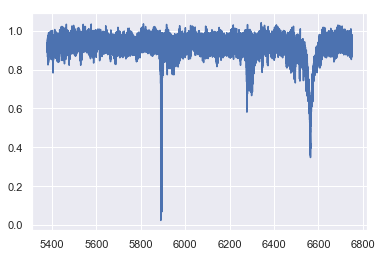

ADP.2014-09-23T11_01_49.103


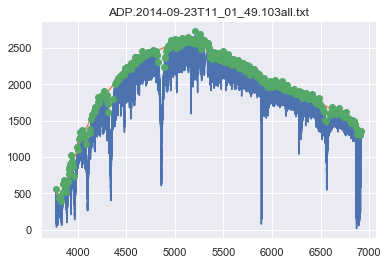

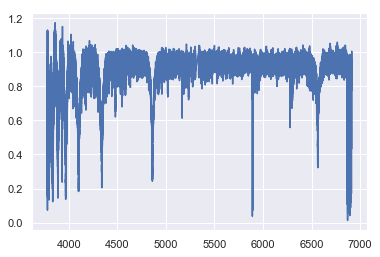

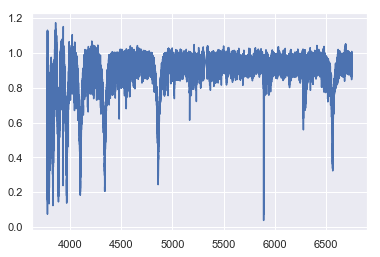

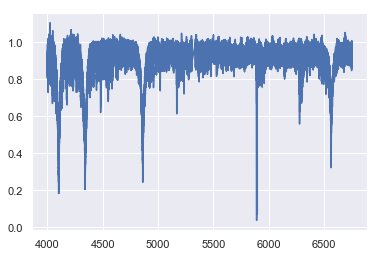

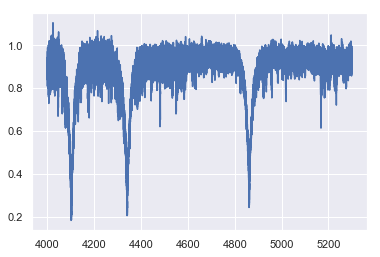

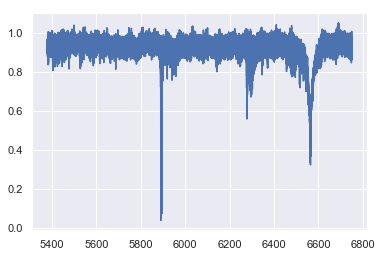

ADP.2014-09-23T11_01_52.180


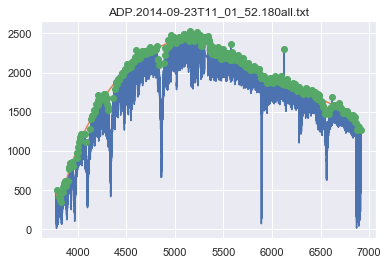

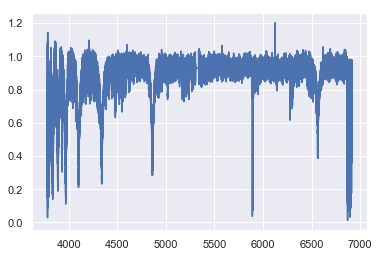

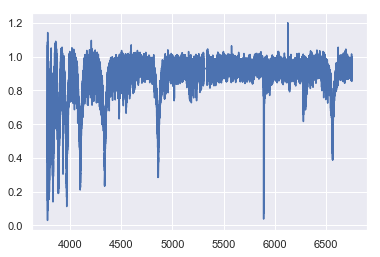

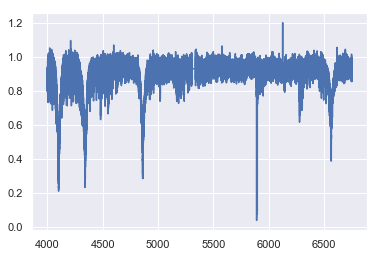

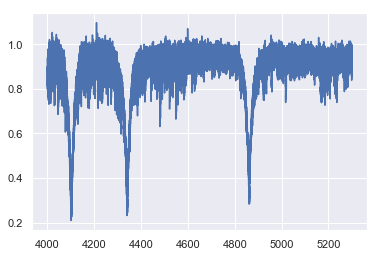

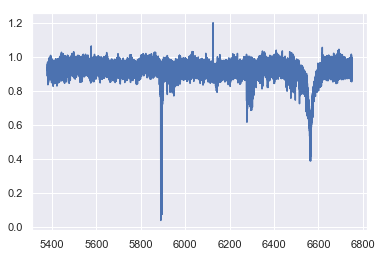

ADP.2014-09-23T11_02_44.973


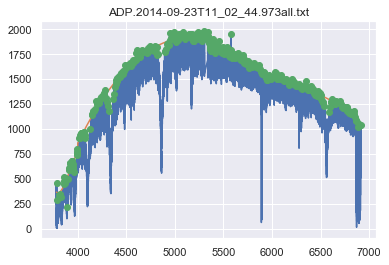

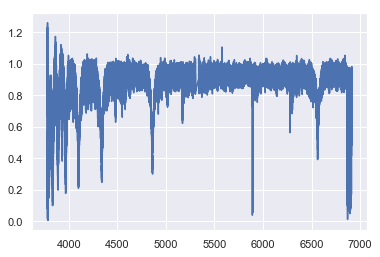

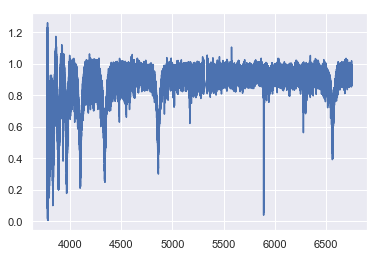

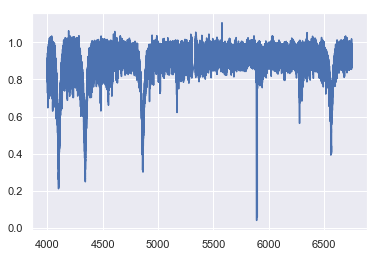

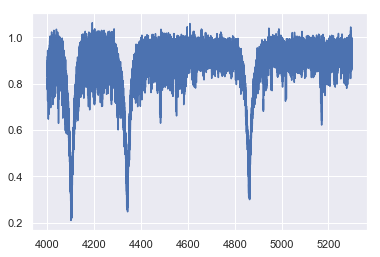

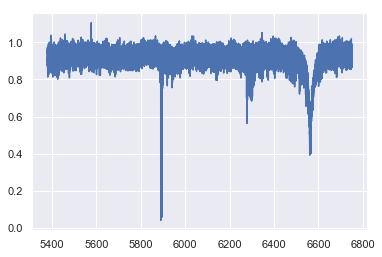

ADP.2014-09-23T11_03_32.913


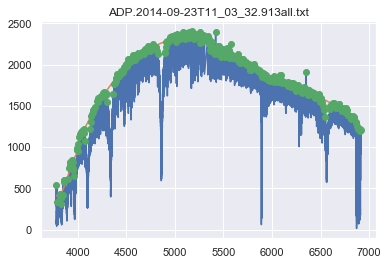

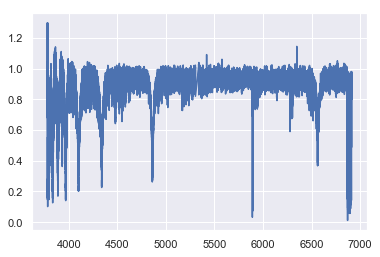

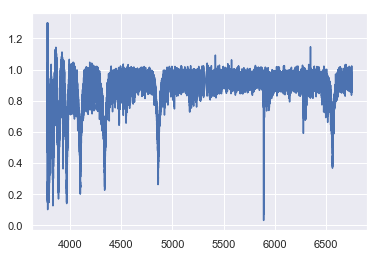

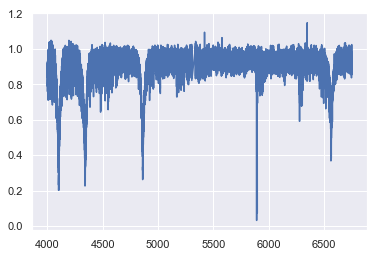

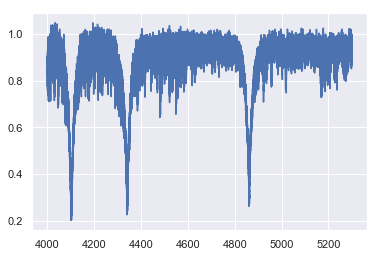

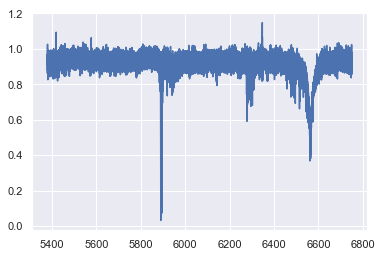

ADP.2014-09-23T11_03_43.473


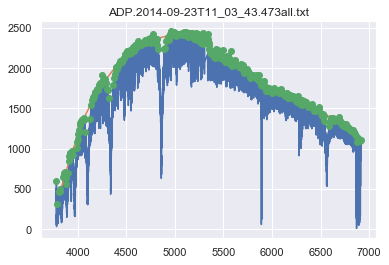

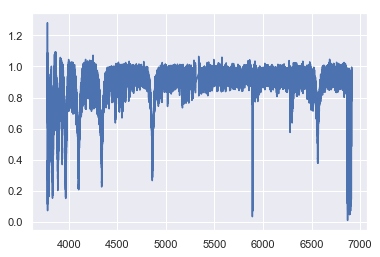

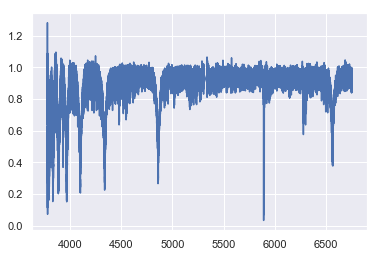

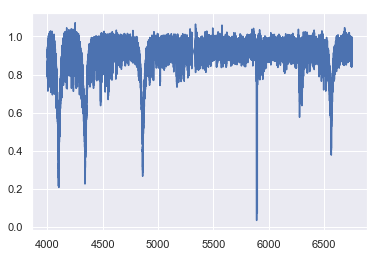

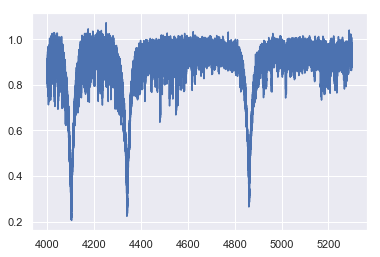

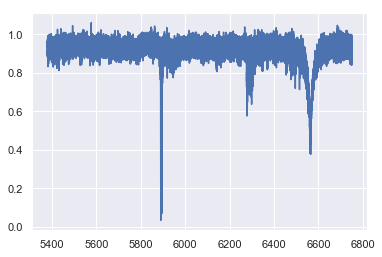

ADP.2014-09-23T11_03_52.867


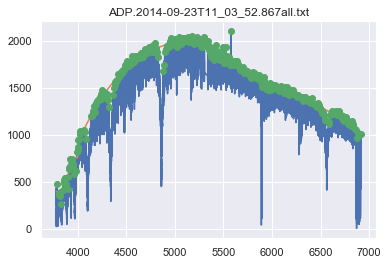

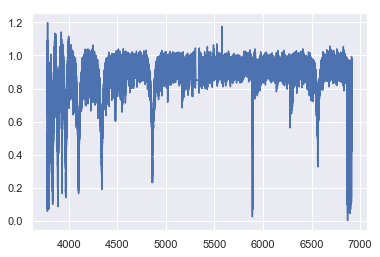

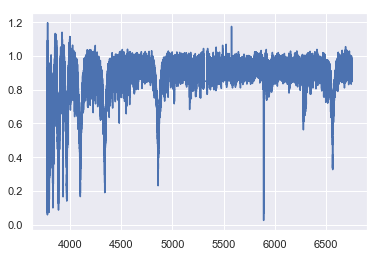

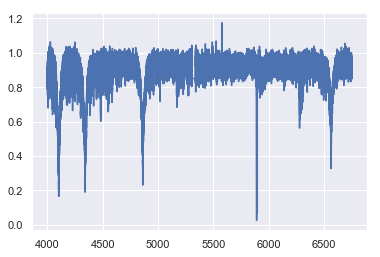

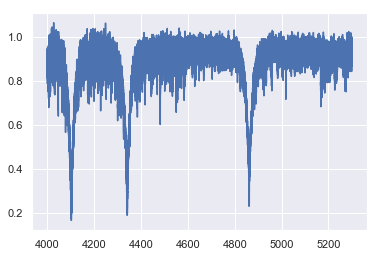

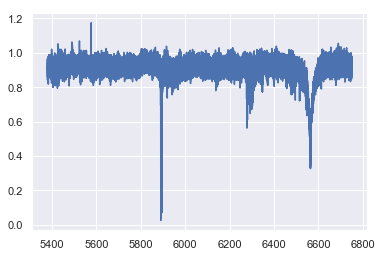

ADP.2014-09-23T11_03_53.490


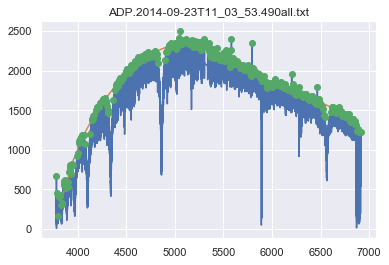

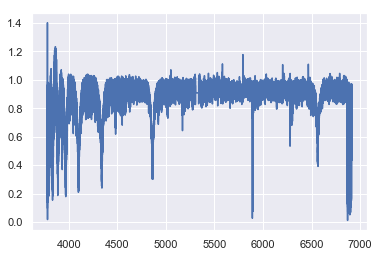

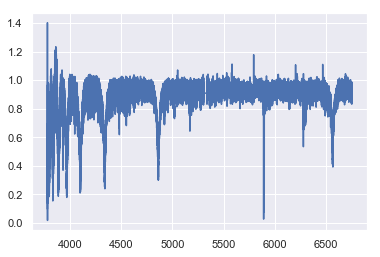

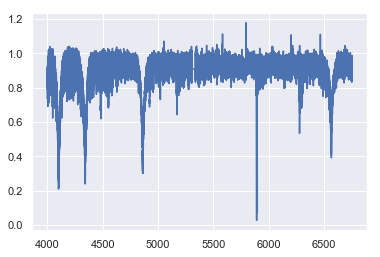

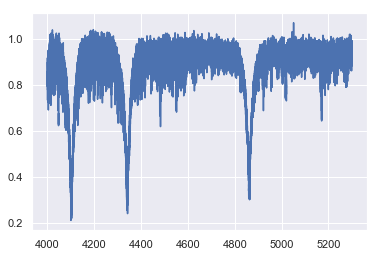

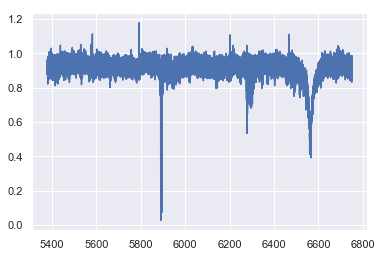

ADP.2014-09-23T11_04_00.803


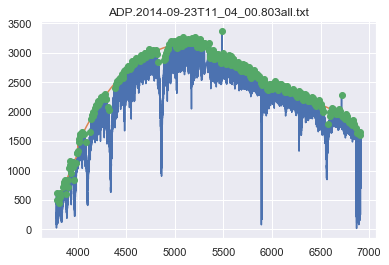

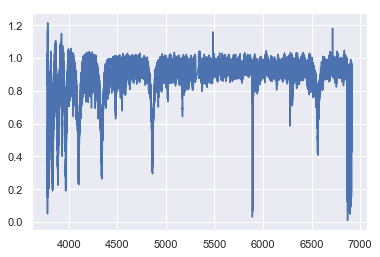

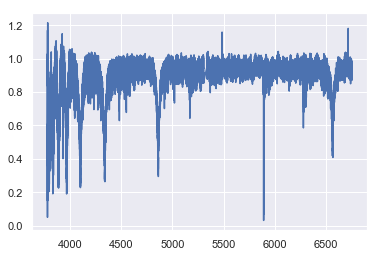

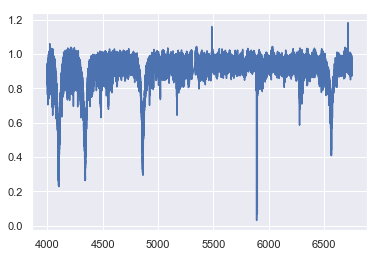

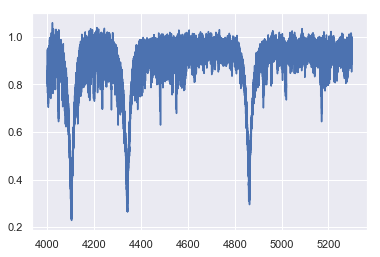

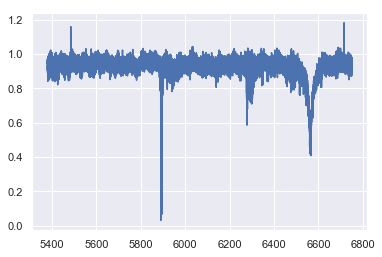

ADP.2014-09-23T11_04_08.257


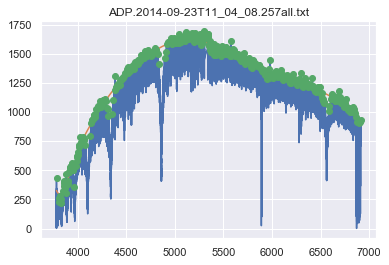

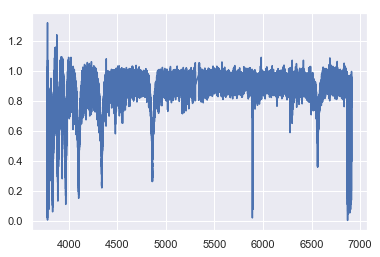

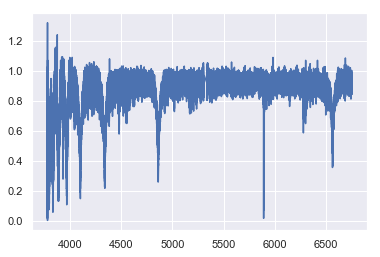

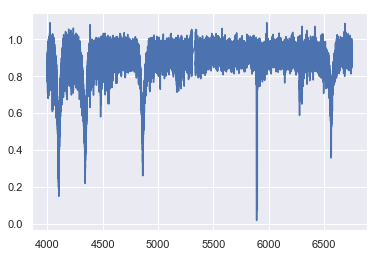

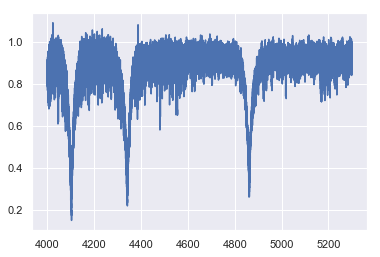

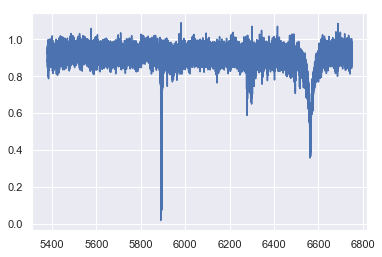

ADP.2014-09-23T11_04_21.177


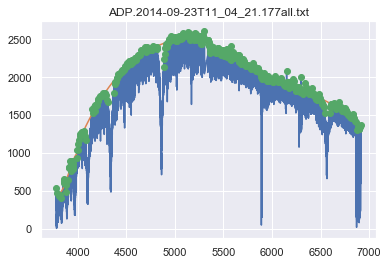

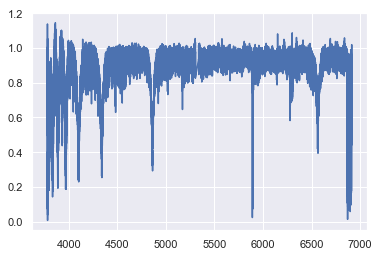

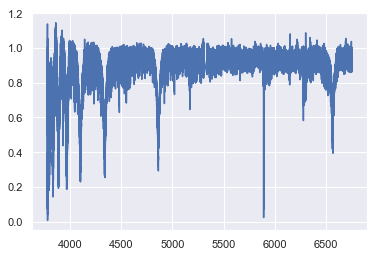

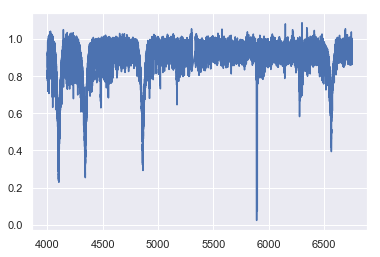

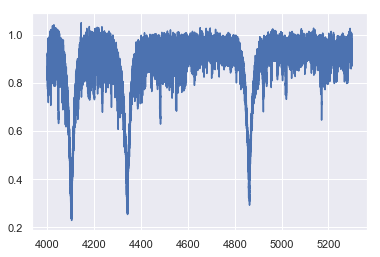

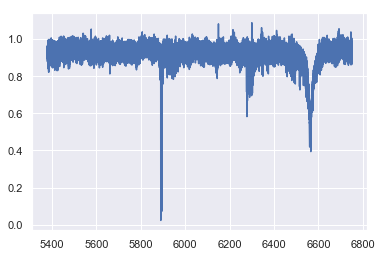

ADP.2014-09-23T11_04_21.897


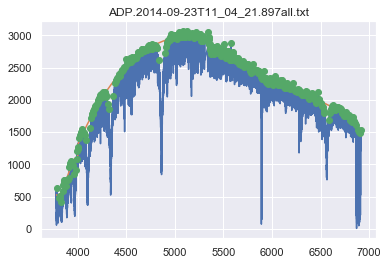

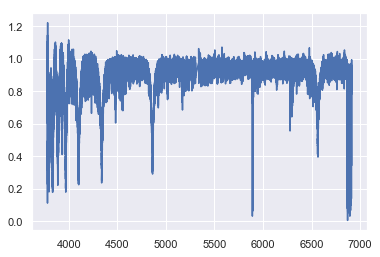

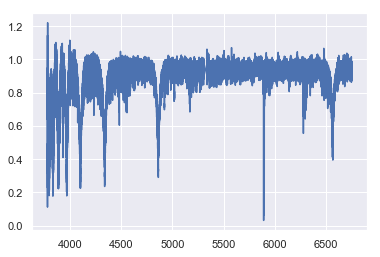

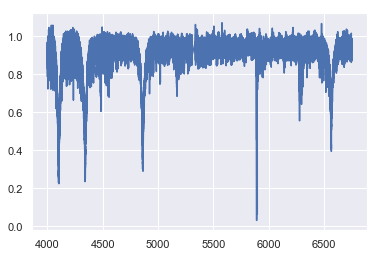

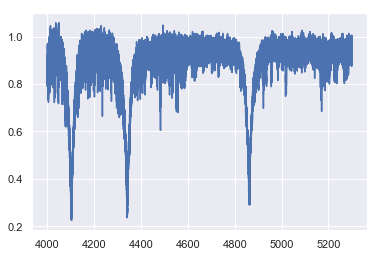

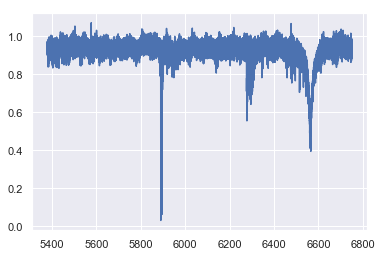

ADP.2014-09-23T11_05_30.717


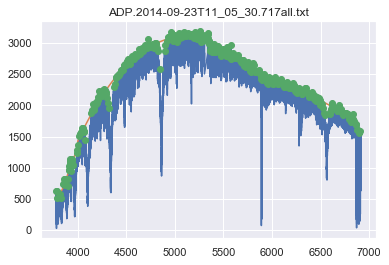

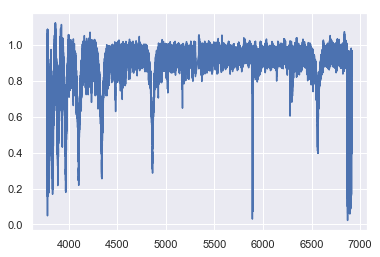

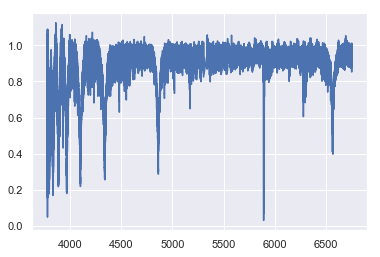

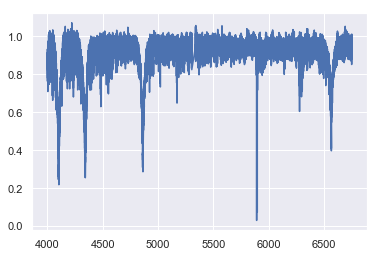

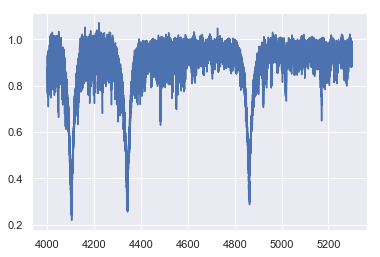

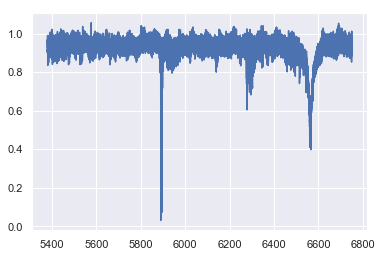

ADP.2014-09-23T11_05_54.643


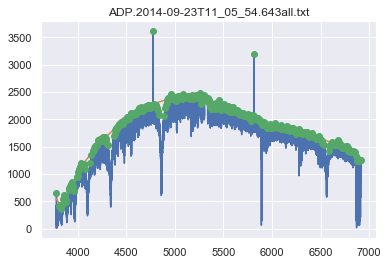

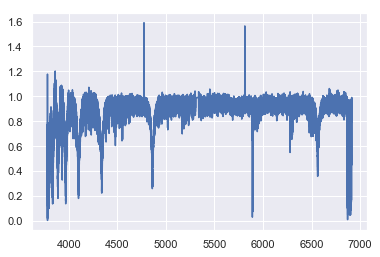

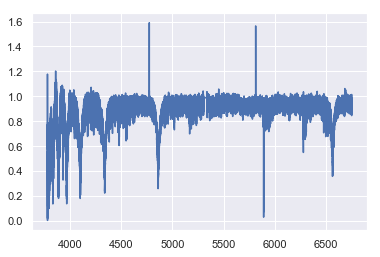

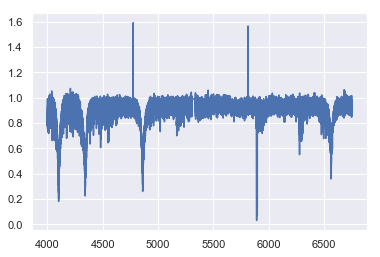

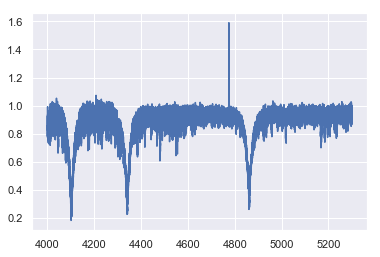

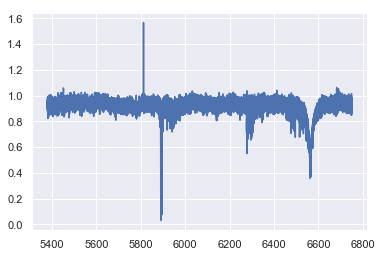

ADP.2014-09-23T11_06_07.137


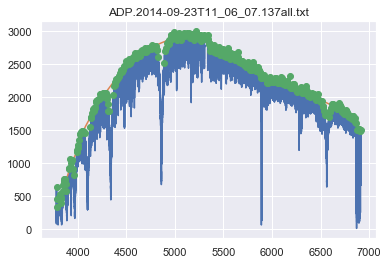

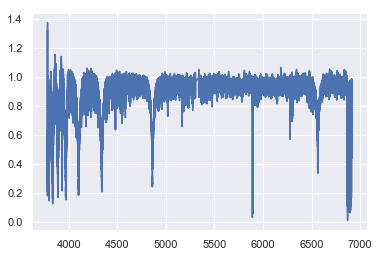

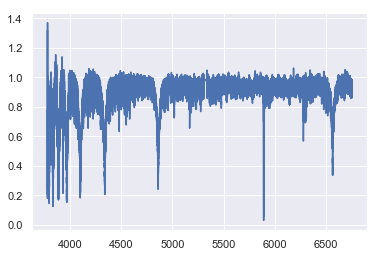

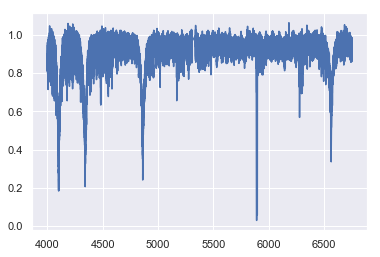

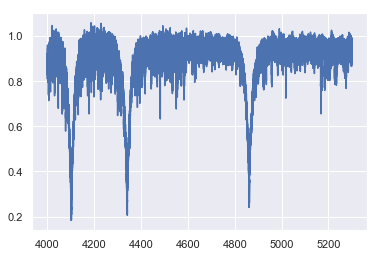

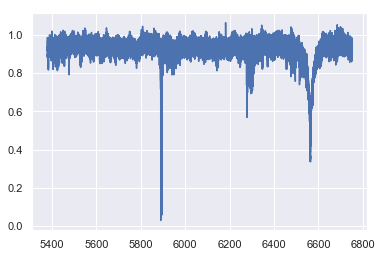

&&&&&&&&&&&&&&


In [131]:
os.chdir('/Users/jtorresh/Desktop/TODO/GradResearch/2014/')
for i in range(len(H['file'][:])):
    print(H['file'][i][:-5])
    allH = np.loadtxt(H['file'][i][:-5]+'all.txt',usecols=(0,1,2,3), unpack=True)
    maxsH = np.loadtxt(H['file'][i][:-5]+'maxs.txt',usecols=(0,1), unpack=True)
    plt.figure()
    plt.title(H['file'][i][:-5]+'all.txt')
    plt.plot(allH[0],allH[1])
    plt.plot(allH[0],allH[3])
    plt.plot(maxsH[0],maxsH[1], 'go')
        
    plt.figure()
    plt.plot(allH[0],allH[2])
    
    plt.figure()
    plt.plot(allH[0][allH[0]<6750],allH[2][allH[0]<6750])
    
    np.savetxt(H['file'][i][:-5]+'frac1.txt', 
               np.asarray([ allH[0][allH[0]<6750],
                           allH[2][allH[0]<6750] ]).T)
    
    plt.figure()
    plt.plot(allH[0][(allH[0]>4000)&(allH[0]<6750)], allH[2][(allH[0]>4000)&(allH[0]<6750)])
    np.savetxt(H['file'][i][:-5]+'frac2.txt', 
               np.asarray([ allH[0][(allH[0]>4000)&(allH[0]<6750)],
                           allH[2][(allH[0]>4000)&(allH[0]<6750)] ]).T)
    
    plt.figure()
    plt.plot(allH[0][(allH[0]>4000)&(allH[0]<5300)], allH[2][(allH[0]>4000)&(allH[0]<5300)])
    np.savetxt(H['file'][i][:-5]+'frac3.txt', 
               np.asarray([ allH[0][(allH[0]>4000)&(allH[0]<5300)],
                           allH[2][(allH[0]>4000)&(allH[0]<5300)] ]).T)
    
    plt.figure()
    plt.plot(allH[0][(allH[0]>5380)&(allH[0]<6750)],allH[2][(allH[0]>5380)&(allH[0]<6750)])
    np.savetxt(H['file'][i][:-5]+'frac4.txt', 
               np.asarray([allH[0][(allH[0]>5380)&(allH[0]<6750)],
                           allH[2][(allH[0]>5380)&(allH[0]<6750)] ]).T)
    
    plt.show()
    
print('&&&&&&&&&&&&&&')

## Change the above outputed .txt files to .dat files

In [133]:
def txt_to_dat(path, wcol, fcol, endsw):
    files=os.listdir(path)
    txts_f = [f for f in files if f.endswith(endsw)]
    for txt_nam in txts_f:
        # i can generalize it to any column
        dt= np.loadtxt(path+txt_nam, usecols=(wcol,fcol), unpack=True)
        np.savetxt(path+txt_nam[:-4]+'.dat', dt.transpose(),comments='#')
    return 


In [134]:
# use 1st and 2nd column only
txt_to_dat("/Users/jtorresh/Desktop/TODO/GradResearch/2014/",0,1, "all.txt")

In [135]:
# use 1st and 2nd column only
txt_to_dat("/Users/jtorresh/Desktop/TODO/GradResearch/2014/",0,1, "frac1.txt")

In [136]:
# use 1st and 2nd column only
txt_to_dat("/Users/jtorresh/Desktop/TODO/GradResearch/2014/",0,1, "frac2.txt")

In [137]:
# use 1st and 2nd column only
txt_to_dat("/Users/jtorresh/Desktop/TODO/GradResearch/2014/",0,1, "frac3.txt")

In [138]:
# use 1st and 2nd column only
txt_to_dat("/Users/jtorresh/Desktop/TODO/GradResearch/2014/",0,1, "frac4.txt")